# Notebook: 2
<hr>




![Alt text](3-tricks-that-car-salesmen-use-to-take-your-money_twitter_card_800x320_v20230104094542.jpg)

<br>

<hr> 

### Nathan Collins

##### **ID:** 12062131

<hr>
<br>

# Data Preprocessing and Exploration

> # Description

The business objective stems from a binary classification problem. 

I am tasked to construct a model that can predict if whether an existing customer is more likely to buy a new car. 

The results of the model can be applied for targeting leads for a marketing campaign.

<br>
<br>

 # Importing the Libraries into a Dataframe

In [163]:
# Import relevant libraries for data analysis and visualisation.

# General libraries
import numpy as np
import pandas as pd

# Visualisation
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import seaborn as sns
import missingno as msno
import altair as alt

# Statistical learning models, preprocessing and metrics
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Other
from scipy.stats import pearsonr
from scipy.stats import mode

# Dismissing Warnings
import warnings
warnings.filterwarnings('ignore')



In [51]:
# Import the dataset and store it in a dataframe called 'cars_df'.

cars_df = pd.read_csv('https://raw.githubusercontent.com/modernth3ory/repurchase_train.csv/main/repurchase_training.csv')

<br>
<br>
<br>
<br>
<br>
<br>
<br>

 # Exploring the Dataset

In [52]:
# Display the first 5 rows of the dataframe.

cars_df.head()

,ID,Target,age_band,gender,car_model,car_segment,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,mth_since_last_serv,annualised_mileage,num_dealers_visited,num_serv_dealer_purchased
0,1,0,3. 35 to 44,Male,model_1,LCV,9,2,10,3,7,5,6,9,8,10,4
1,2,0,NaN,NaN,model_2,Small/Medium,6,10,3,10,4,9,10,6,10,7,10
2,3,0,NaN,Male,model_3,Large/SUV,9,10,9,10,9,10,10,7,10,6,10
3,5,0,NaN,NaN,model_3,Large/SUV,5,8,5,8,4,5,6,4,10,9,7
4,6,0,NaN,Female,model_2,Small/Medium,8,9,4,10,7,9,8,5,4,4,9


In [53]:
# Display the last 5 rows of the dataframe.

cars_df.tail()

,ID,Target,age_band,gender,car_model,car_segment,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,mth_since_last_serv,annualised_mileage,num_dealers_visited,num_serv_dealer_purchased
131332,154134,1,NaN,NaN,model_3,Large/SUV,7,10,10,9,10,10,10,3,6,10,10
131333,154135,1,NaN,NaN,model_3,Large/SUV,4,10,10,10,10,10,10,2,3,10,10
131334,154137,1,NaN,NaN,model_5,Large/SUV,4,4,9,5,4,3,8,4,7,10,10
131335,154138,1,NaN,NaN,model_5,Large/SUV,2,1,10,1,10,9,8,3,6,7,10
131336,154139,1,NaN,NaN,model_1,LCV,6,1,7,1,10,10,5,3,4,9,10


In [54]:
# Display the shape of the dataframe.

cars_df.shape

(131337, 17)

In [55]:
# Display the summary statistics of the dataframe.

cars_df.describe()

,ID,Target,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,mth_since_last_serv,annualised_mileage,num_dealers_visited,num_serv_dealer_purchased
count,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000
mean,77097.384180,0.026809,5.493022,5.452500,5.472517,5.452287,5.497050,5.481692,5.454967,5.469807,5.502836,5.485438,5.480778
std,44501.636704,0.161525,2.843299,2.884328,2.870665,2.886528,2.878699,2.880408,2.875961,2.859756,2.854896,2.876772,2.867524
min,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,38563.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,77132.000000,0.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
75%,115668.000000,0.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
max,154139.000000,1.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [56]:
# Display the information about the dataframe.

cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131337 entries, 0 to 131336
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   ID                         131337 non-null  int64 
 1   Target                     131337 non-null  int64 
 2   age_band                   18962 non-null   object
 3   gender                     62029 non-null   object
 4   car_model                  131337 non-null  object
 5   car_segment                131337 non-null  object
 6   age_of_vehicle_years       131337 non-null  int64 
 7   sched_serv_warr            131337 non-null  int64 
 8   non_sched_serv_warr        131337 non-null  int64 
 9   sched_serv_paid            131337 non-null  int64 
 10  non_sched_serv_paid        131337 non-null  int64 
 11  total_paid_services        131337 non-null  int64 
 12  total_services             131337 non-null  int64 
 13  mth_since_last_serv        131337 non-null  

> ##### Insights

- The dataset contains [ **17** ] columns.

- Dataset contains both categorical and numerical variables, with NaN values in [ **2** ] columns, [ **age_band** and **gender** ].

- The columns containing object variables are: [ **age_band, gender, car_model, car_segment** ]. 

- All remaining features are [ **int64** ] variables.

<br>
<br>
<br>
<br>
<br>
<br>
<br>


 # Data Cleaning


### Determine if there are any duplicate rows in the dataset and remove them.

In [57]:
# Drop the ID column from the dataframe.

cars_df.drop('ID', axis=1, inplace=True)

# Determine whether the data contains any duplicate entries.

duplicates = cars_df.duplicated().sum()
print("Number of duplicated entries:", duplicates)

Number of duplicated entries: 2726


[ 2726 ] duplicate entries detected. 

Removal of these entries is paramount, as it may create bias in the model and result in inaccuracy. 

Removal does not account for any information loss.

<br>
<br>


In [58]:
# Drop duplicate entries.
cars_df.drop_duplicates(inplace=True)

<br>
<br>
<br>
<br>
<br>
<br>
<br>


### Determine which columns contain NaN values and amend them.

In [59]:
# Display the missing values in the dataset.

cars_df.isnull().sum()

# Create a null table with number of nans and percentage of nans.

null_table = pd.DataFrame(cars_df.isnull().sum().sort_values(ascending=False))
null_table.columns = ['Number of NaNs']
null_table['Percentage of NaNs'] = null_table['Number of NaNs'] / len(cars_df) * 100
null_table


,Number of NaNs,Percentage of NaNs
age_band,109668,85.271089
gender,67455,52.448857
Target,0,0.000000
car_model,0,0.000000
car_segment,0,0.000000
age_of_vehicle_years,0,0.000000
sched_serv_warr,0,0.000000
non_sched_serv_warr,0,0.000000
sched_serv_paid,0,0.000000
non_sched_serv_paid,0,0.000000


<AxesSubplot:>

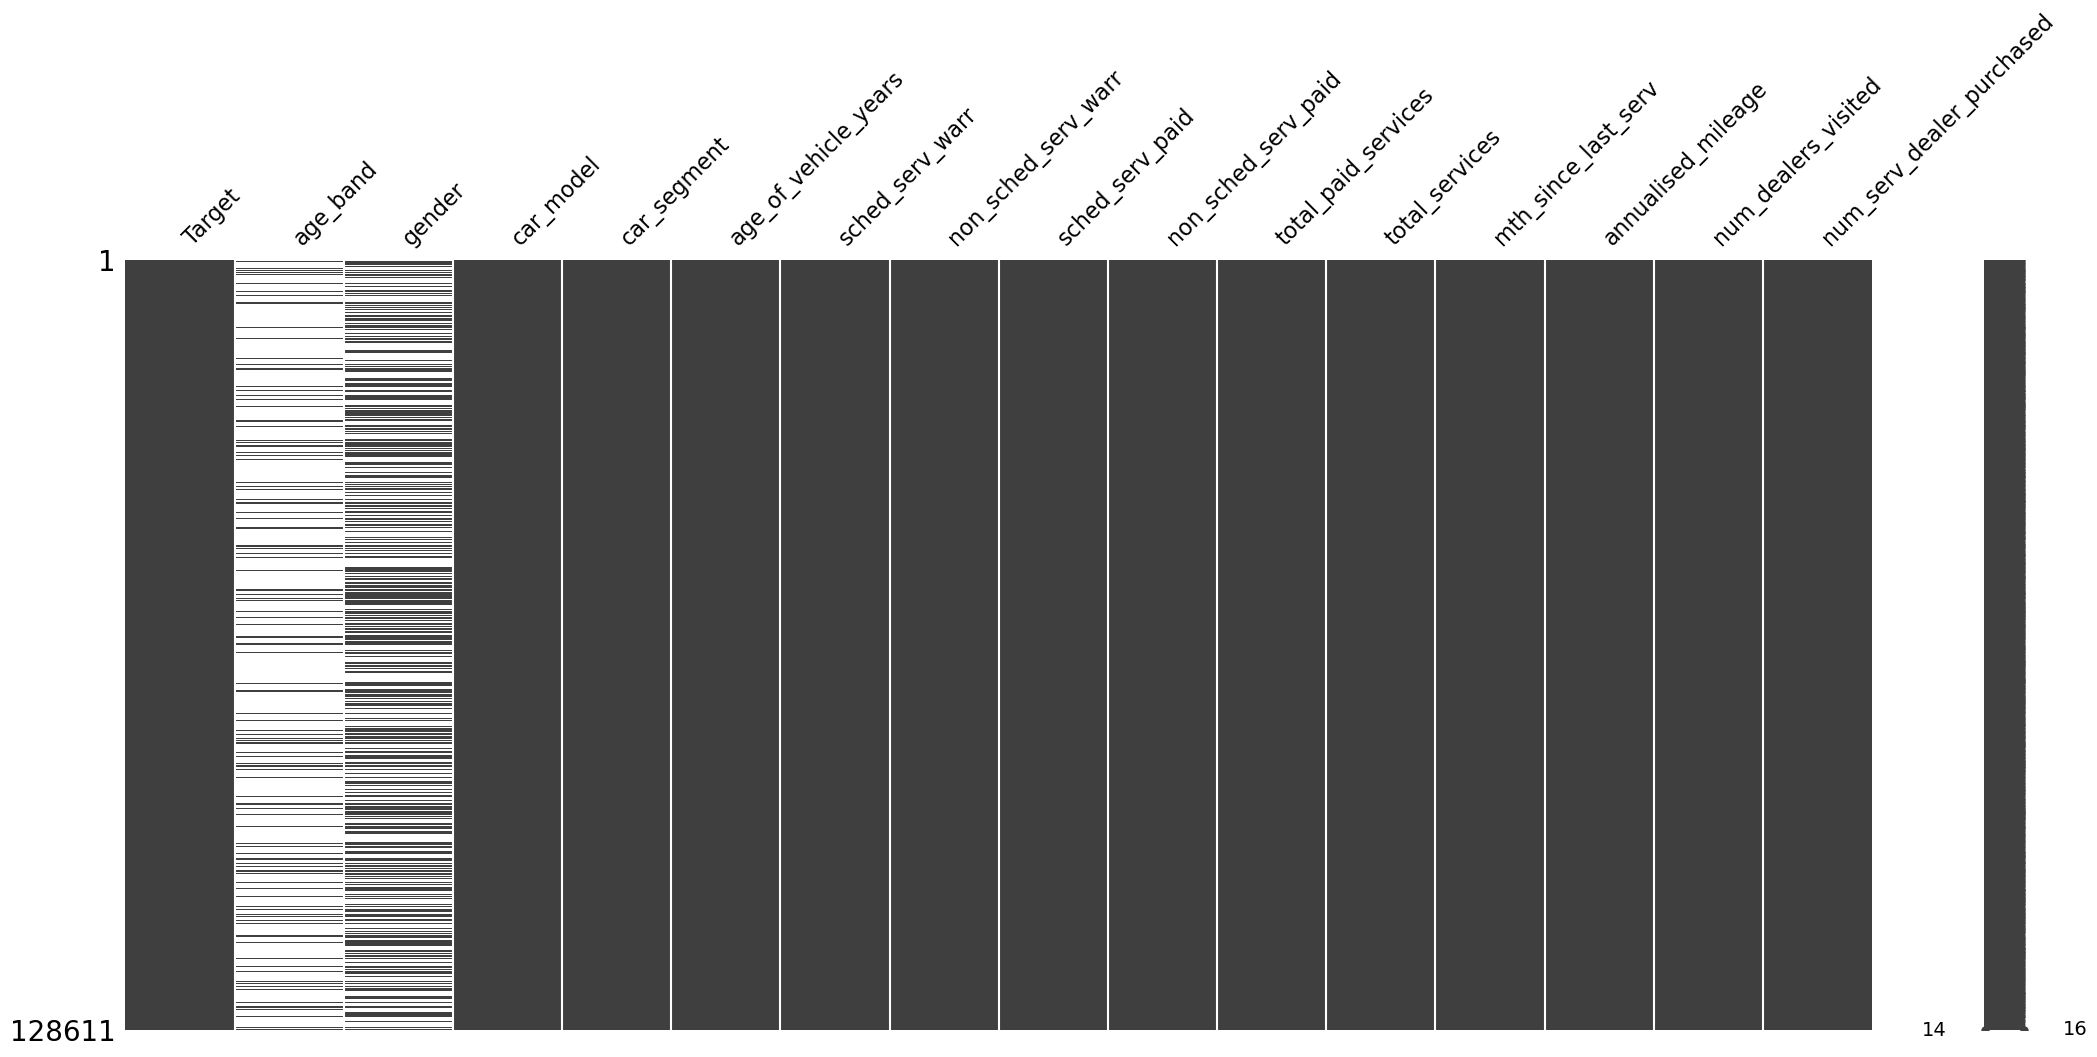

In [60]:
# Visualise missing values in the dataframe using missingno library.

msno.matrix(cars_df)

Since age_band and gender may provide important insights during modelling, retaining these features will be prioritised in a separate dataframe.

<br>
<br>

In [61]:
# Display the age_band column.

cars_df['age_band'].value_counts()

4. 45 to 54    4051
3. 35 to 44    3830
2. 25 to 34    3546
5. 55 to 64    3392
6. 65 to 74    2138
7. 75+         1019
1. <25          967
Name: age_band, dtype: int64

In [62]:
# Display the gender column.

cars_df['gender'].value_counts()

Male      35440
Female    25716
Name: gender, dtype: int64

<br>
<br>
<br>

## Creating the two cleaned dataframes: 

- `[ cars_df ] with all columns`

- `[ cars_df ] with no age and gender columns`

<br>

In [63]:
# Make a copy of original dataset for cleaning.

cars_df_clean = cars_df.copy()

### Convert all categorical (nominal) features into numerical (ordinal) features.

In [64]:
# Display the information about the current dataframe.

cars_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128611 entries, 0 to 131336
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   Target                     128611 non-null  int64 
 1   age_band                   18943 non-null   object
 2   gender                     61156 non-null   object
 3   car_model                  128611 non-null  object
 4   car_segment                128611 non-null  object
 5   age_of_vehicle_years       128611 non-null  int64 
 6   sched_serv_warr            128611 non-null  int64 
 7   non_sched_serv_warr        128611 non-null  int64 
 8   sched_serv_paid            128611 non-null  int64 
 9   non_sched_serv_paid        128611 non-null  int64 
 10  total_paid_services        128611 non-null  int64 
 11  total_services             128611 non-null  int64 
 12  mth_since_last_serv        128611 non-null  int64 
 13  annualised_mileage         128611 non-null  

In [65]:
# Create a new dataframe called 'cars_NAG' by dropping the 'age_band' and 'gender' columns.

cars_NAG = cars_df_clean.drop(['age_band', 'gender'], axis=1)

# Display the shape of the new dataframe.

cars_NAG.shape


(128611, 14)

#### Create a new dataframe without NaN values, while retaining the age and gender columns.

In [66]:
# Create a new dataframe called 'cars_ALL' which contains all rows with no missing values.

cars_ALL = cars_df_clean.dropna()

# Display the shape of the new dataframe.

cars_ALL.shape


(18289, 16)

#### Convert the "age_band" column in the "cars_NAG" dataset into numerical variables.

<AxesSubplot:xlabel='age_band', ylabel='count'>

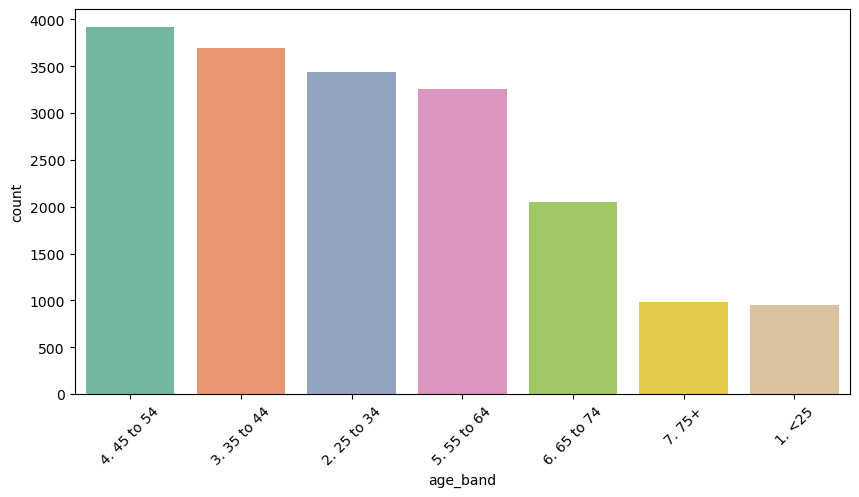

In [67]:
# Visualise the distribution of the 1. <25, 2. 25-34, 3. 35-44, 4. 45-54, 5. 55-64, 6. 65-74, 7. 75+ age bands. Rotate the x-axis labels by 45 degrees. Order the age bands from lowest to highest.

plt.figure(figsize=(10, 5))
plt.xticks(rotation=45)
sns.countplot(x=cars_ALL['age_band'], order=cars_ALL['age_band'].value_counts().index, palette='Set2')

In [68]:
# Display the age band column.

cars_ALL['age_band'].value_counts()

# Convert the age_band column to numerical values using one hot encoding.

cars_ALL = pd.concat([cars_ALL, pd.get_dummies(cars_ALL['age_band'])], axis=1)

# Delete the age_band column.

del cars_ALL['age_band']

# Display the first 5 rows of the new dataframe.

cars_ALL.head()

,Target,gender,car_model,car_segment,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,...,annualised_mileage,num_dealers_visited,num_serv_dealer_purchased,1. <25,2. 25 to 34,3. 35 to 44,4. 45 to 54,5. 55 to 64,6. 65 to 74,7. 75+
0,0,Male,model_1,LCV,9,2,10,3,7,5,...,8,10,4,0,0,1,0,0,0,0
6,0,Male,model_3,Large/SUV,8,2,8,2,9,9,...,6,10,4,1,0,0,0,0,0,0
34,0,Female,model_2,Small/Medium,5,10,6,9,7,8,...,9,3,10,0,1,0,0,0,0,0
38,0,Female,model_2,Small/Medium,7,8,2,8,2,5,...,9,7,7,0,0,0,1,0,0,0
51,0,Female,model_7,LCV,6,4,4,4,6,5,...,10,7,1,0,1,0,0,0,0,0


#### Convert the "gender" column in the "cars_ALL" dataset into numerical variables.

In [69]:
# Display the gender column.

cars_ALL['gender'].value_counts()

# Convert the gender column to numerical values using one hot encoding.

cars_ALL = pd.concat([cars_ALL, pd.get_dummies(cars_ALL['gender'])], axis=1)

# Delete the gender column.

del cars_ALL['gender']

# Display the first 5 rows of the new dataframe.

cars_ALL.head()


,Target,car_model,car_segment,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,...,num_serv_dealer_purchased,1. <25,2. 25 to 34,3. 35 to 44,4. 45 to 54,5. 55 to 64,6. 65 to 74,7. 75+,Female,Male
0,0,model_1,LCV,9,2,10,3,7,5,6,...,4,0,0,1,0,0,0,0,0,1
6,0,model_3,Large/SUV,8,2,8,2,9,9,4,...,4,1,0,0,0,0,0,0,0,1
34,0,model_2,Small/Medium,5,10,6,9,7,8,9,...,10,0,1,0,0,0,0,0,1,0
38,0,model_2,Small/Medium,7,8,2,8,2,5,6,...,7,0,0,0,1,0,0,0,1,0
51,0,model_7,LCV,6,4,4,4,6,5,4,...,1,0,1,0,0,0,0,0,1,0


#### Convert the "car_model" column in both dataframes, into numerical variables.

In [70]:
# Remove the "model_" string in the car_model column, of both dataframes.

cars_ALL['car_model'] = cars_ALL['car_model'].str.replace('model_', '')
cars_NAG['car_model'] = cars_NAG['car_model'].str.replace('model_', '')

# Convert the car_model column to numerical values.

cars_ALL['car_model'] = pd.to_numeric(cars_ALL['car_model'])
cars_NAG['car_model'] = pd.to_numeric(cars_NAG['car_model'])

#### Convert the "car_segment" column in both dataframes, into numerical variables.

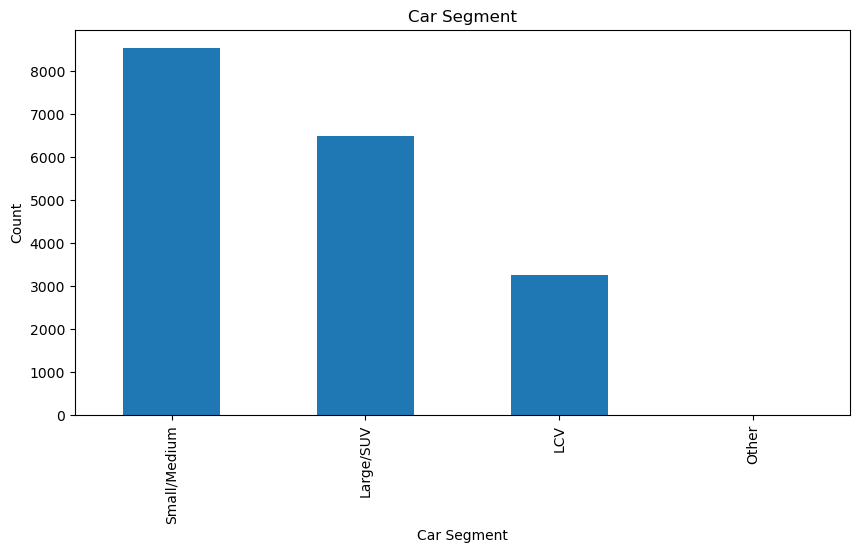

In [71]:
# Display the car_segment column as a bar chart.

cars_ALL['car_segment'].value_counts().plot(kind='bar', figsize=(10, 5))
plt.title('Car Segment'), 
plt.xlabel('Car Segment'), 
plt.ylabel('Count'), 
plt.show()


In [72]:
# Count the number of other cars in the car_segment column.

cars_ALL['car_segment'].value_counts()['Other']

2

In [73]:
# Convert the car_segment column in both dataframes to numerical values using one hot encoding.

cars_ALL = pd.concat([cars_ALL, pd.get_dummies(cars_ALL['car_segment'])], axis=1)
cars_NAG = pd.concat([cars_NAG, pd.get_dummies(cars_NAG['car_segment'])], axis=1)

# Delete the car_segment column in both dataframes.

del cars_ALL['car_segment']
del cars_NAG['car_segment']

In [74]:
# Display the range of features in both dataframes.

cars_ALL.describe().loc[["min", "max"],:]

,Target,car_model,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,mth_since_last_serv,...,4. 45 to 54,5. 55 to 64,6. 65 to 74,7. 75+,Female,Male,LCV,Large/SUV,Other,Small/Medium
min,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.0,18.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [75]:
# Sort all possible values for every numerical feature in the dataset.

for column in cars_ALL.select_dtypes(include=['int64']).columns:
    print(sorted(cars_ALL[column].unique()))

[0, 1]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [76]:
# Display the range of features in both dataframes.

cars_NAG.describe().loc[["min", "max"],:]

,Target,car_model,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,mth_since_last_serv,annualised_mileage,num_dealers_visited,num_serv_dealer_purchased,LCV,Large/SUV,Other,Small/Medium
min,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
max,1.0,19.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,1.0,1.0,1.0


In [77]:
# Sort all possible values for every numerical feature in the dataset.

for column in cars_NAG.select_dtypes(include=['int64']).columns:
    print(sorted(cars_NAG[column].unique()))

[0, 1]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


> ##### Insights

There are now two dataframes to work with:

- `cars_ALL` retains all features, minus the rows with `NaN values`. 

- Age and gender were deemed important features, and thus were not removed. The only caveat, is there are significantly less rows in this dataframe.

- `cars_NAG` removes columns `age_band` and `gender`. 

- This provides more rows to work with, but at the cost of losing some important features.

<br>

This approach was selected, as it is believed age and gender may play an influential role in the decision to buy a new car.

The dataset is now considered clean.

<br>
<br>
<br>
<br>
<br>
<br>
<br>


 # Exploratory Data Analysis


### Visualising correlations between features and the target variable.

<AxesSubplot:>

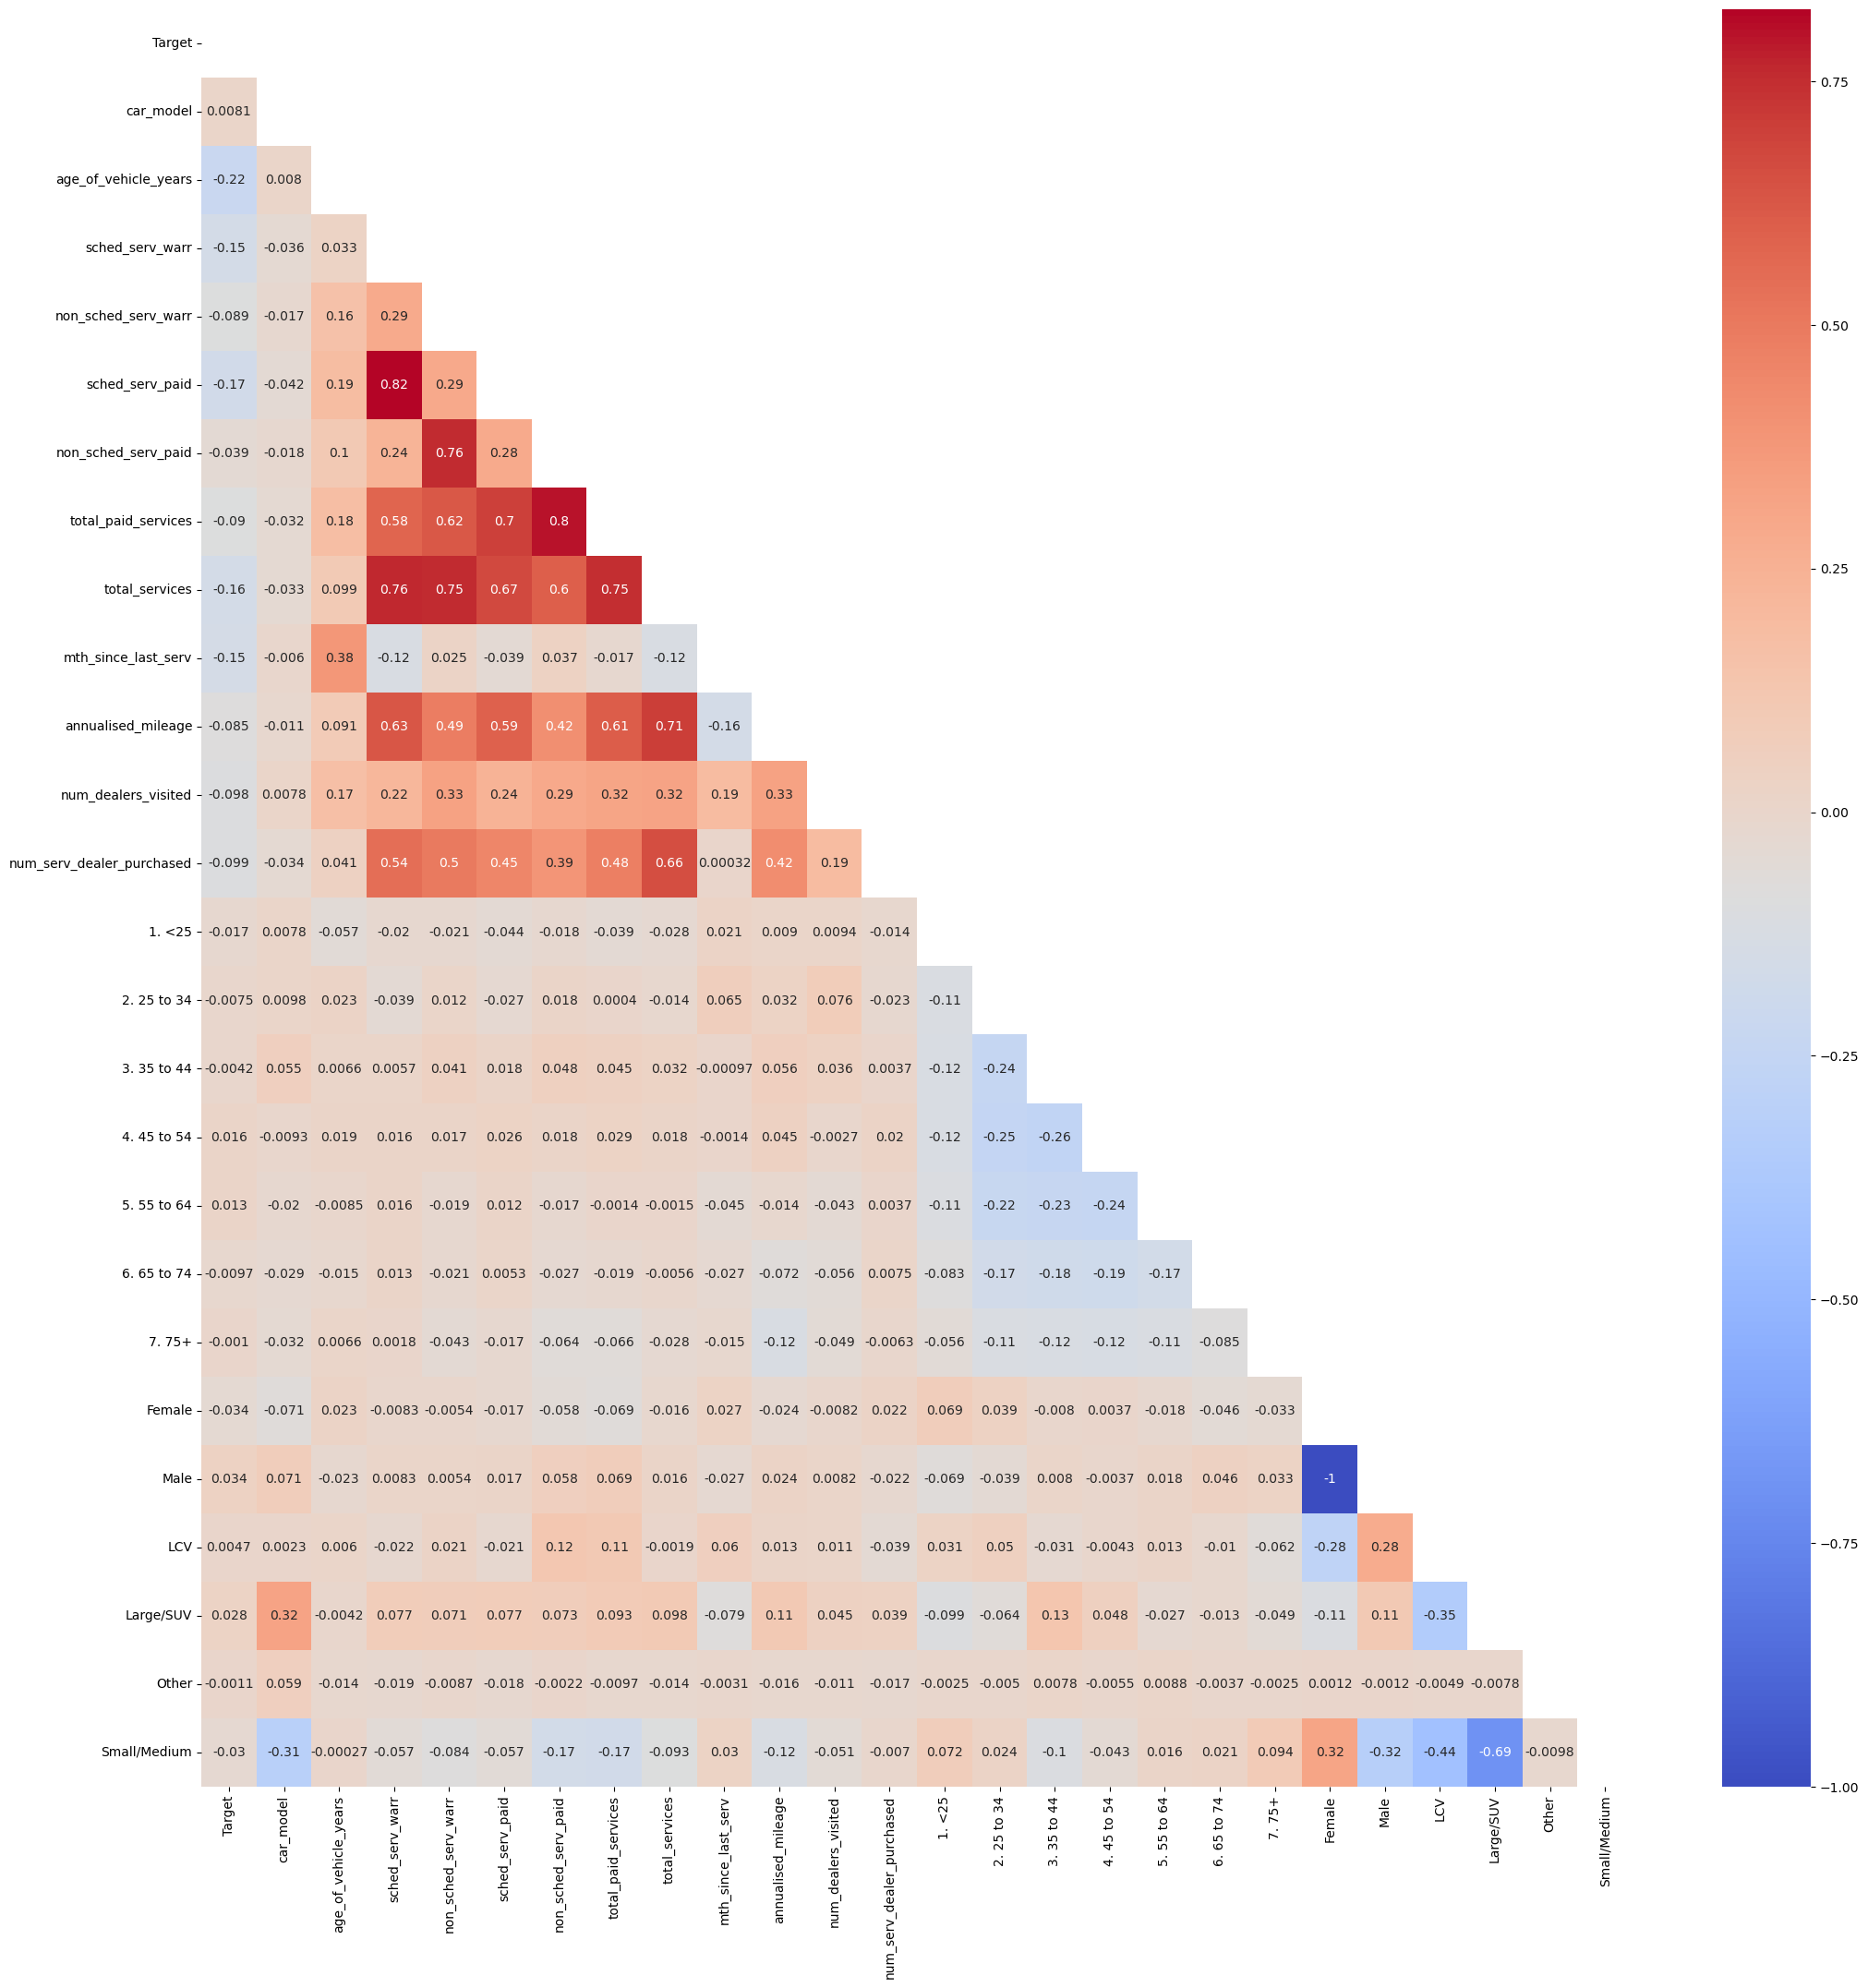

In [78]:
# Visualise correlation between the features using a heatmap.
corr= cars_ALL.corr()

# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(corr)

# using the upper triangle matrix as mask 
plt.figure(figsize=(25,25))
sns.heatmap(corr, annot=True, cmap='coolwarm', mask=matrix)

In [79]:
# Display the highest correlated features of both dataframe, with the Target.

# Calculate the correlation between Target and all features in cars_ALL
corr_ALL = cars_ALL.corr()['Target'].sort_values(ascending=False)

# Create a DataFrame with the 10 most correlated features in cars_ALL
df_ALL = pd.DataFrame({'cars_ALL': corr_ALL.index[:11], 'correlation_ALL': corr_ALL.values[:11]})

# Calculate the correlation between Target and all features in cars_NAG
corr_NAG = cars_NAG.corr()['Target'].sort_values(ascending=False)

# Create a DataFrame with the 10 most correlated features in cars_NAG
df_NAG = pd.DataFrame({'cars_NAG': corr_NAG.index[:11], 'correlation_NAG': corr_NAG.values[:11]})

# Concatenate the two DataFrames to create a new DataFrame with 4 columns
df_corr = pd.concat([df_ALL, df_NAG], axis=1)

# Print the resulting DataFrame
print(df_corr)

       cars_ALL  correlation_ALL                   cars_NAG  correlation_NAG
0        Target         1.000000                     Target         1.000000
1          Male         0.033980                  Large/SUV         0.015211
2     Large/SUV         0.027986                        LCV         0.010342
3   4. 45 to 54         0.016244                  car_model         0.000575
4   5. 55 to 64         0.013153                      Other        -0.001319
5     car_model         0.008100               Small/Medium        -0.023228
6           LCV         0.004723        non_sched_serv_paid        -0.033297
7        7. 75+        -0.001011        num_dealers_visited        -0.053589
8         Other        -0.001083  num_serv_dealer_purchased        -0.058963
9   3. 35 to 44        -0.004205         annualised_mileage        -0.080251
10  2. 25 to 34        -0.007470        non_sched_serv_warr        -0.088442


> ##### Insights

- Correlations in both dataframes between features and the target variable are very weak.

- While `cars_ALL` contains `~110,000` less rows than `cars_NAG`, key features removed in `cars_NAG` do appear to have stronger correlations with the target variable. For example, Males and age brackets 45 to 54 and 55 to 64 are more likely to buy a new car.

<br>
<br>
<br>
<br>
<br>
<br>
<br>


### Investigating the cohort of customers who have bought a new car.

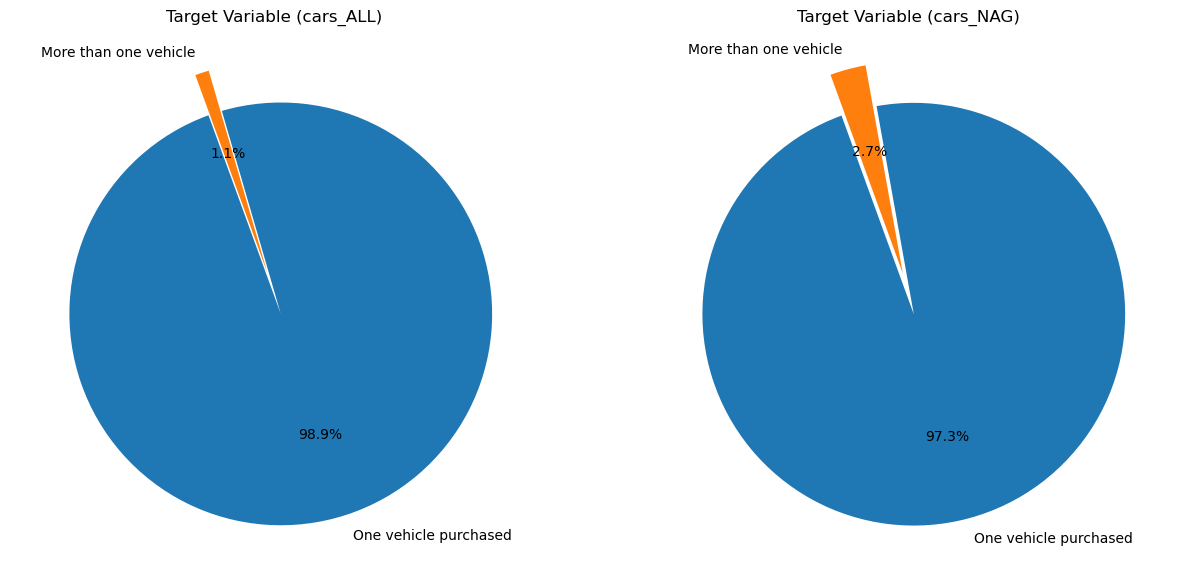

In [80]:
# Visualise the target variable in both cars_ALL and cars_NAG using a pie chart.

fig, ax = plt.subplots(1, 2, figsize=(15, 7))
cars_ALL['Target'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=110, explode=(0.1, 0.1), labels=['One vehicle purchased', 'More than one vehicle'], ax=ax[0]), ax[0].set_title('Target Variable (cars_ALL)'), ax[0].set_ylabel('')
cars_NAG['Target'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=110, explode=(0.1, 0.1), labels=['One vehicle purchased', 'More than one vehicle'], ax=ax[1]), ax[1].set_title('Target Variable (cars_NAG)'), ax[1].set_ylabel('')
plt.show()

In [81]:
# Count the number of rows where the target variable is equal to 1.

Cohort1 = cars_ALL['Target'].value_counts()[1]
Cohort2 = cars_NAG['Target'].value_counts()[1]

# Calculate the percentage of the target variable in both dataframes.

print('Target audience of cars_ALL:', Cohort1)
print('Percentage of Target in cars_ALL:', Cohort1 / len(cars_ALL) * 100, '%', '\n')
print('Target audience of cars_NAG:', Cohort2)
print('Percentage of Target in cars_NAG:', Cohort2 / len(cars_NAG) * 100, '%')

Target audience of cars_ALL: 194
Percentage of Target in cars_ALL: 1.0607468970419376 % 

Target audience of cars_NAG: 3521
Percentage of Target in cars_NAG: 2.7377129483481197 %


> ##### Insights

- The cohort of interest only represents a low percentage of the total dataset.

<br>
<br>
<br>
<br>
<br>
<br>
<br>


### Investigating the interests of the cohort.

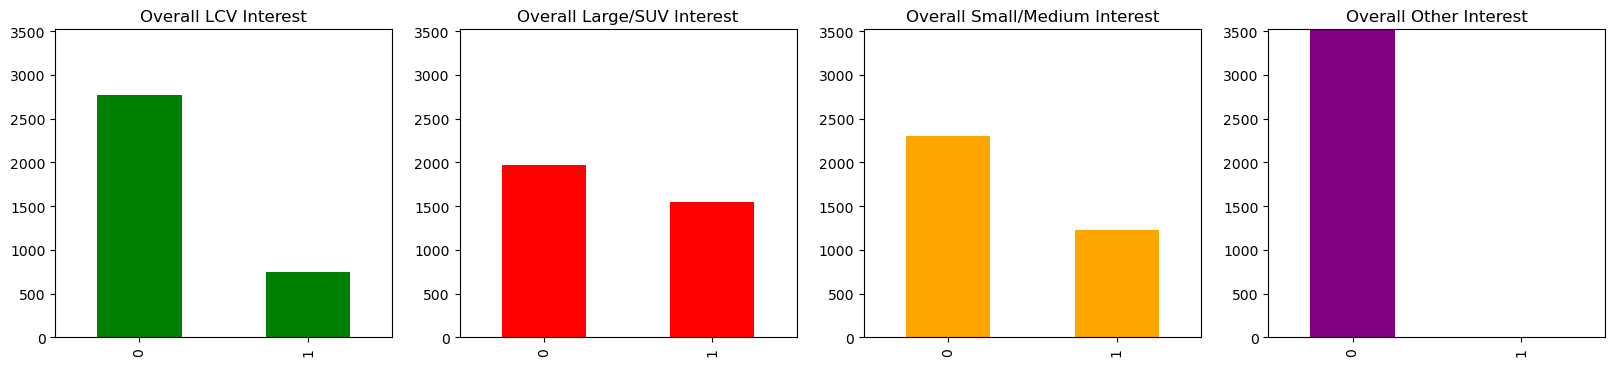

In [82]:
# For cars_NAG rows with a Target value of 1, visualise the car_model and 'LCV', 'Large/SUV', 'Small/Medium', 'Other' columns in separate bar charts.
fig, ax = plt.subplots(1, 4, figsize=(20, 4))

max_y = max(cars_NAG[cars_NAG['Target'] == 1]['LCV'].value_counts().max(),
            cars_NAG[cars_NAG['Target'] == 1]['Large/SUV'].value_counts().max(),
            cars_NAG[cars_NAG['Target'] == 1]['Small/Medium'].value_counts().max(),
            cars_NAG[cars_NAG['Target'] == 1]['Other'].value_counts().max())

for j in range(4):
    ax[j].set_ylim([0, max_y])

cars_NAG[cars_NAG['Target'] == 1]['LCV'].value_counts().plot(kind='bar', ax=ax[0], title='Overall LCV Interest', color='green')
cars_NAG[cars_NAG['Target'] == 1]['Large/SUV'].value_counts().plot(kind='bar', ax=ax[1], title='Overall Large/SUV Interest', color='red')
cars_NAG[cars_NAG['Target'] == 1]['Small/Medium'].value_counts().plot(kind='bar', ax=ax[2], title='Overall Small/Medium Interest', color='orange')
cars_NAG[cars_NAG['Target'] == 1]['Other'].value_counts().plot(kind='bar', ax=ax[3], title='Overall Other Interest', color='purple')

plt.show()

<AxesSubplot:title={'center':'Female Other Interest'}>

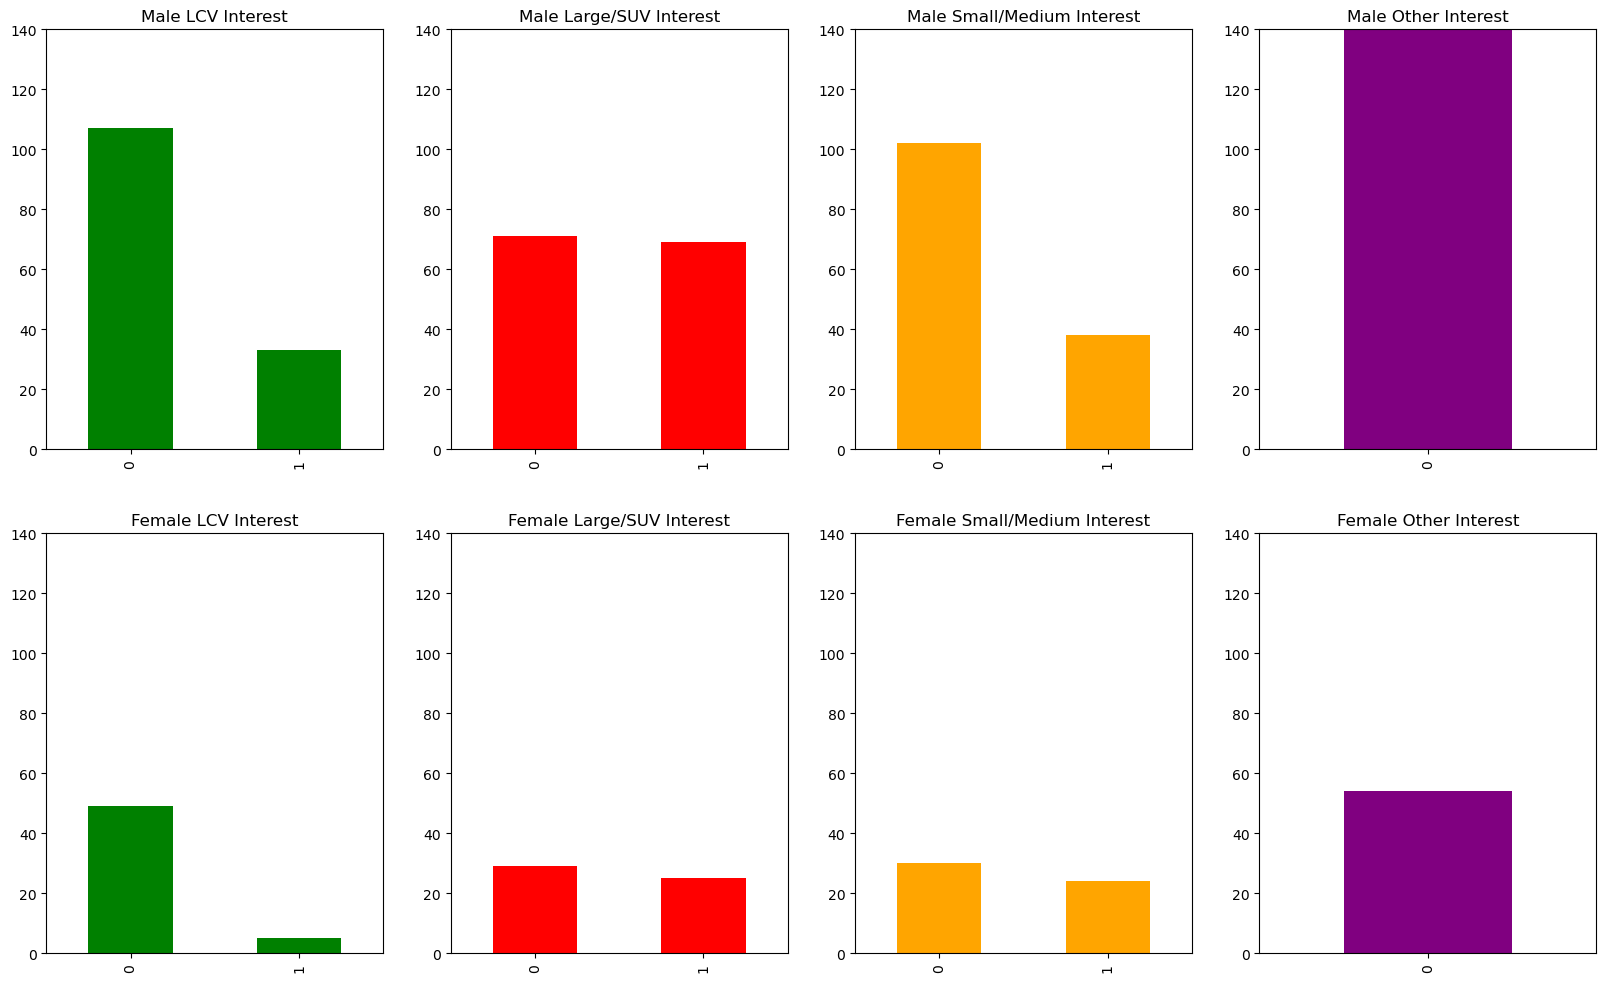

In [83]:
# For cars_ALL rows with a Target value of 1, visualise the car_model and 'LCV', 'Large/SUV', 'Small/Medium', 'Other' columns between genders, in separate bar charts.
fig, ax = plt.subplots(2, 4, figsize=(20, 12))

max_y = max(cars_ALL[(cars_ALL['Target'] == 1) & (cars_ALL['Male'] == 1)]['LCV'].value_counts().max(),
            cars_ALL[(cars_ALL['Target'] == 1) & (cars_ALL['Male'] == 1)]['Large/SUV'].value_counts().max(),
            cars_ALL[(cars_ALL['Target'] == 1) & (cars_ALL['Male'] == 1)]['Small/Medium'].value_counts().max(),
            cars_ALL[(cars_ALL['Target'] == 1) & (cars_ALL['Male'] == 1)]['Other'].value_counts().max(),
            cars_ALL[(cars_ALL['Target'] == 1) & (cars_ALL['Female'] == 1)]['LCV'].value_counts().max(),
            cars_ALL[(cars_ALL['Target'] == 1) & (cars_ALL['Female'] == 1)]['Large/SUV'].value_counts().max(),
            cars_ALL[(cars_ALL['Target'] == 1) & (cars_ALL['Female'] == 1)]['Small/Medium'].value_counts().max(),
            cars_ALL[(cars_ALL['Target'] == 1) & (cars_ALL['Female'] == 1)]['Other'].value_counts().max())

for i in range(2):
    for j in range(4):
        ax[i][j].set_ylim([0, max_y])

cars_ALL[(cars_ALL['Target'] == 1) & (cars_ALL['Male'] == 1)]['LCV'].value_counts().plot(kind='bar', ax=ax[0][0], title='Male LCV Interest', color='green')
cars_ALL[(cars_ALL['Target'] == 1) & (cars_ALL['Male'] == 1)]['Large/SUV'].value_counts().plot(kind='bar', ax=ax[0][1], title='Male Large/SUV Interest', color='red')
cars_ALL[(cars_ALL['Target'] == 1) & (cars_ALL['Male'] == 1)]['Small/Medium'].value_counts().plot(kind='bar', ax=ax[0][2], title='Male Small/Medium Interest', color='orange')
cars_ALL[(cars_ALL['Target'] == 1) & (cars_ALL['Male'] == 1)]['Other'].value_counts().plot(kind='bar', ax=ax[0][3], title='Male Other Interest', color='purple')

cars_ALL[(cars_ALL['Target'] == 1) & (cars_ALL['Female'] == 1)]['LCV'].value_counts().plot(kind='bar', ax=ax[1][0], title='Female LCV Interest', color='green')
cars_ALL[(cars_ALL['Target'] == 1) & (cars_ALL['Female'] == 1)]['Large/SUV'].value_counts().plot(kind='bar', ax=ax[1][1], title='Female Large/SUV Interest', color='red')
cars_ALL[(cars_ALL['Target'] == 1) & (cars_ALL['Female'] == 1)]['Small/Medium'].value_counts().plot(kind='bar', ax=ax[1][2], title='Female Small/Medium Interest', color='orange')
cars_ALL[(cars_ALL['Target'] == 1) & (cars_ALL['Female'] == 1)]['Other'].value_counts().plot(kind='bar', ax=ax[1][3], title='Female Other Interest', color='purple')


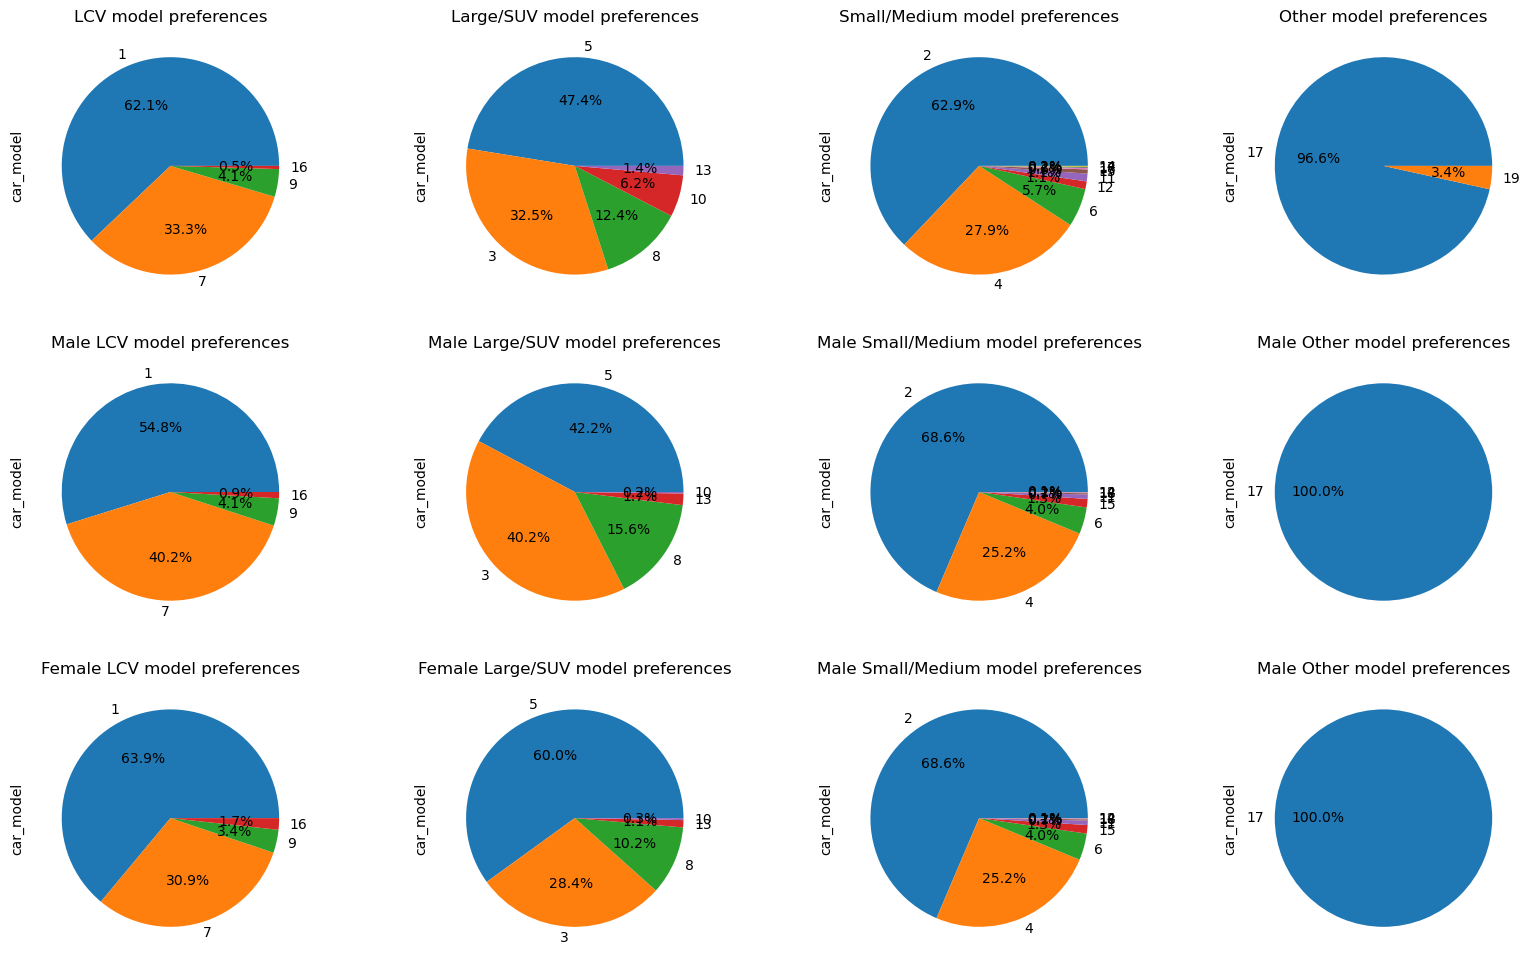

In [84]:
# Visualise rows with LCV = 1, display the frequency of each car_model in a bar chart.
fig, ax = plt.subplots(3, 4, figsize=(20, 12))

cars_NAG[cars_NAG['LCV'] == 1]['car_model'].value_counts().plot(kind='pie', title='LCV model preferences', ax=ax[0][0], autopct='%1.1f%%')
cars_NAG[cars_NAG['Large/SUV'] == 1]['car_model'].value_counts().plot(kind='pie', title='Large/SUV model preferences', ax=ax[0][1], autopct='%1.1f%%')
cars_NAG[cars_NAG['Small/Medium'] == 1]['car_model'].value_counts().plot(kind='pie', title='Small/Medium model preferences', ax=ax[0][2], autopct='%1.1f%%')
cars_NAG[cars_NAG['Other'] == 1]['car_model'].value_counts().plot(kind='pie', title='Other model preferences', ax=ax[0][3], autopct='%1.1f%%')

cars_ALL[(cars_ALL['LCV'] == 1) & (cars_ALL['Male'] == 1)]['car_model'].value_counts().plot(kind='pie', title='Male LCV model preferences', ax=ax[1][0], autopct='%1.1f%%')
cars_ALL[(cars_ALL['Large/SUV'] == 1) & (cars_ALL['Male'] == 1)]['car_model'].value_counts().plot(kind='pie', title='Male Large/SUV model preferences', ax=ax[1][1], autopct='%1.1f%%')
cars_ALL[(cars_ALL['Small/Medium'] == 1) & (cars_ALL['Male'] == 1)]['car_model'].value_counts().plot(kind='pie', title='Male Small/Medium model preferences', ax=ax[1][2], autopct='%1.1f%%')
cars_ALL[(cars_ALL['Other'] == 1) & (cars_ALL['Male'] == 1)]['car_model'].value_counts().plot(kind='pie', title='Male Other model preferences', ax=ax[1][3], autopct='%1.1f%%')

cars_ALL[(cars_ALL['LCV'] == 1) & (cars_ALL['Female'] == 1)]['car_model'].value_counts().plot(kind='pie', title='Female LCV model preferences', ax=ax[2][0], autopct='%1.1f%%')
cars_ALL[(cars_ALL['Large/SUV'] == 1) & (cars_ALL['Female'] == 1)]['car_model'].value_counts().plot(kind='pie', title='Female Large/SUV model preferences', ax=ax[2][1], autopct='%1.1f%%')
cars_ALL[(cars_ALL['Small/Medium'] == 1) & (cars_ALL['Male'] == 1)]['car_model'].value_counts().plot(kind='pie', title='Male Small/Medium model preferences', ax=ax[2][2], autopct='%1.1f%%')
cars_ALL[(cars_ALL['Other'] == 1) & (cars_ALL['Male'] == 1)]['car_model'].value_counts().plot(kind='pie', title='Male Other model preferences', ax=ax[2][3], autopct='%1.1f%%')

plt.show()

> ##### Insights

- When not factoring age or gender, the cohort of interest preferences [ Large/SUV ] cars, with [ Small/Medium ] close behind.

- When factoring in gender, males preference [ Large/SUV ] vehicles, while females preference equal [ Small/Medium ] and [ Large/SUV ] vehicles, proportionate to the total in the dataset.

- There is not a lot of difference in model preferences between genders, although the small sample of females in the dataset prefer model [ 5 ] of [ Large/SUV ] vehicles, while males prefer both model [ 5 ] and [ 3 ].

<br>
<br>
<br>
<br>
<br>
<br>
<br>


### Investigating the influences of age and gender on the cohort of interest.

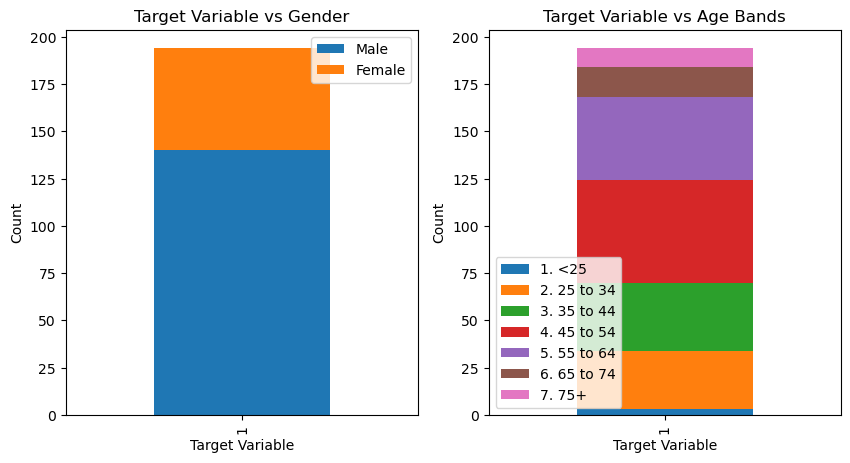

In [85]:
# Visualise only the values of 1 in the target column, against the 'Male' and 'Female' columns using a bar chart.
# Visualise only the values of 1 in the target column, against '1. <25', '2. 25 to 34', '3. 35 to 44', '4. 45 to 54', '5. 55 to 64', '6. 65 to 74', '7. 75+' columns using a bar chart.

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

cars_ALL[cars_ALL['Target'] == 1].groupby('Target')['Male', 'Female'].sum().plot(kind='bar', stacked=True, ax=ax[0])
ax[0].set_title('Target Variable vs Gender')
ax[0].set_xlabel('Target Variable')
ax[0].set_ylabel('Count')

cars_ALL[cars_ALL['Target'] == 1].groupby('Target')['1. <25', '2. 25 to 34', '3. 35 to 44', '4. 45 to 54', '5. 55 to 64', '6. 65 to 74', '7. 75+'].sum().plot(kind='bar', stacked=True, ax=ax[1])
ax[1].set_title('Target Variable vs Age Bands')
ax[1].set_xlabel('Target Variable')
ax[1].set_ylabel('Count')

plt.show()

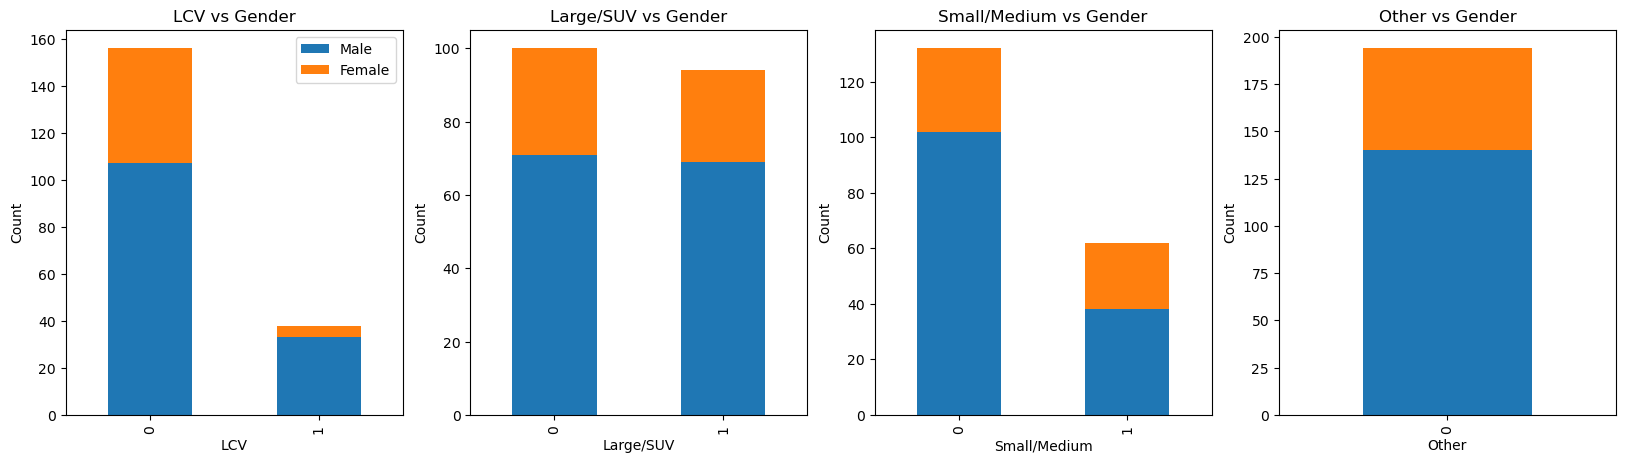

In [86]:
# Visualise the target variable with a value of 1, against LCV, Large/SUV, Small/Medium, and Other. Shown as percentages.

fig, ax = plt.subplots(1, 4, figsize=(20, 5))

cars_ALL[cars_ALL['Target'] == 1].groupby('LCV')['Male', 'Female'].sum().plot(kind='bar', stacked=True, ax=ax[0])
ax[0].set_title('LCV vs Gender')
ax[0].set_xlabel('LCV')
ax[0].set_ylabel('Count')

cars_ALL[cars_ALL['Target'] == 1].groupby('Large/SUV')['Male', 'Female'].sum().plot(kind='bar', stacked=True, legend=False, ax=ax[1])
ax[1].set_title('Large/SUV vs Gender')
ax[1].set_xlabel('Large/SUV')
ax[1].set_ylabel('Count')

cars_ALL[cars_ALL['Target'] == 1].groupby('Small/Medium')['Male', 'Female'].sum().plot(kind='bar', stacked=True, legend=False, ax=ax[2])
ax[2].set_title('Small/Medium vs Gender')
ax[2].set_xlabel('Small/Medium')
ax[2].set_ylabel('Count')

cars_ALL[cars_ALL['Target'] == 1].groupby('Other')['Male', 'Female'].sum().plot(kind='bar', stacked=True, legend=False, ax=ax[3])
ax[3].set_title('Other vs Gender')
ax[3].set_xlabel('Other')
ax[3].set_ylabel('Count')

plt.show()

In [87]:
# Create a contingency table of the target variable and the Male column, with percentages.

pd.crosstab(cars_ALL['Target'], cars_ALL['Male'], normalize='index') * 100

Male,0,1
Target,,
0,44.305057,55.694943
1,27.835052,72.164948


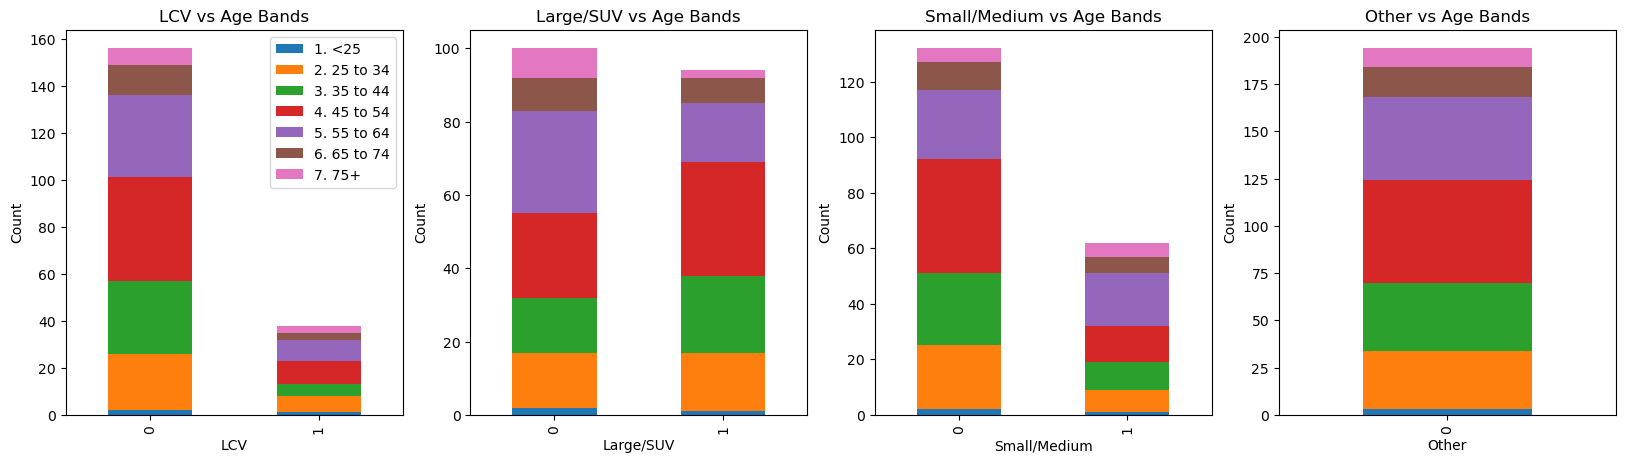

In [88]:
# Visualise the target variable with a value of 1, against LCV, Large/SUV, Small/Medium, and Other. Shown as percentages.

fig, ax = plt.subplots(1, 4, figsize=(20, 5))

cars_ALL[cars_ALL['Target'] == 1].groupby('LCV')['1. <25', '2. 25 to 34', '3. 35 to 44', '4. 45 to 54', '5. 55 to 64', '6. 65 to 74', '7. 75+'].sum().plot(kind='bar', stacked=True, ax=ax[0])
ax[0].set_title('LCV vs Age Bands')
ax[0].set_xlabel('LCV')
ax[0].set_ylabel('Count')

cars_ALL[cars_ALL['Target'] == 1].groupby('Large/SUV')['1. <25', '2. 25 to 34', '3. 35 to 44', '4. 45 to 54', '5. 55 to 64', '6. 65 to 74', '7. 75+'].sum().plot(kind='bar', stacked=True, legend=False, ax=ax[1])
ax[1].set_title('Large/SUV vs Age Bands')
ax[1].set_xlabel('Large/SUV')
ax[1].set_ylabel('Count')

cars_ALL[cars_ALL['Target'] == 1].groupby('Small/Medium')['1. <25', '2. 25 to 34', '3. 35 to 44', '4. 45 to 54', '5. 55 to 64', '6. 65 to 74', '7. 75+'].sum().plot(kind='bar', stacked=True, legend=False, ax=ax[2])
ax[2].set_title('Small/Medium vs Age Bands')
ax[2].set_xlabel('Small/Medium')
ax[2].set_ylabel('Count')

cars_ALL[cars_ALL['Target'] == 1].groupby('Other')['1. <25', '2. 25 to 34', '3. 35 to 44', '4. 45 to 54', '5. 55 to 64', '6. 65 to 74', '7. 75+'].sum().plot(kind='bar', stacked=True, legend=False, ax=ax[3])
ax[3].set_title('Other vs Age Bands')
ax[3].set_xlabel('Other')
ax[3].set_ylabel('Count')

plt.show()


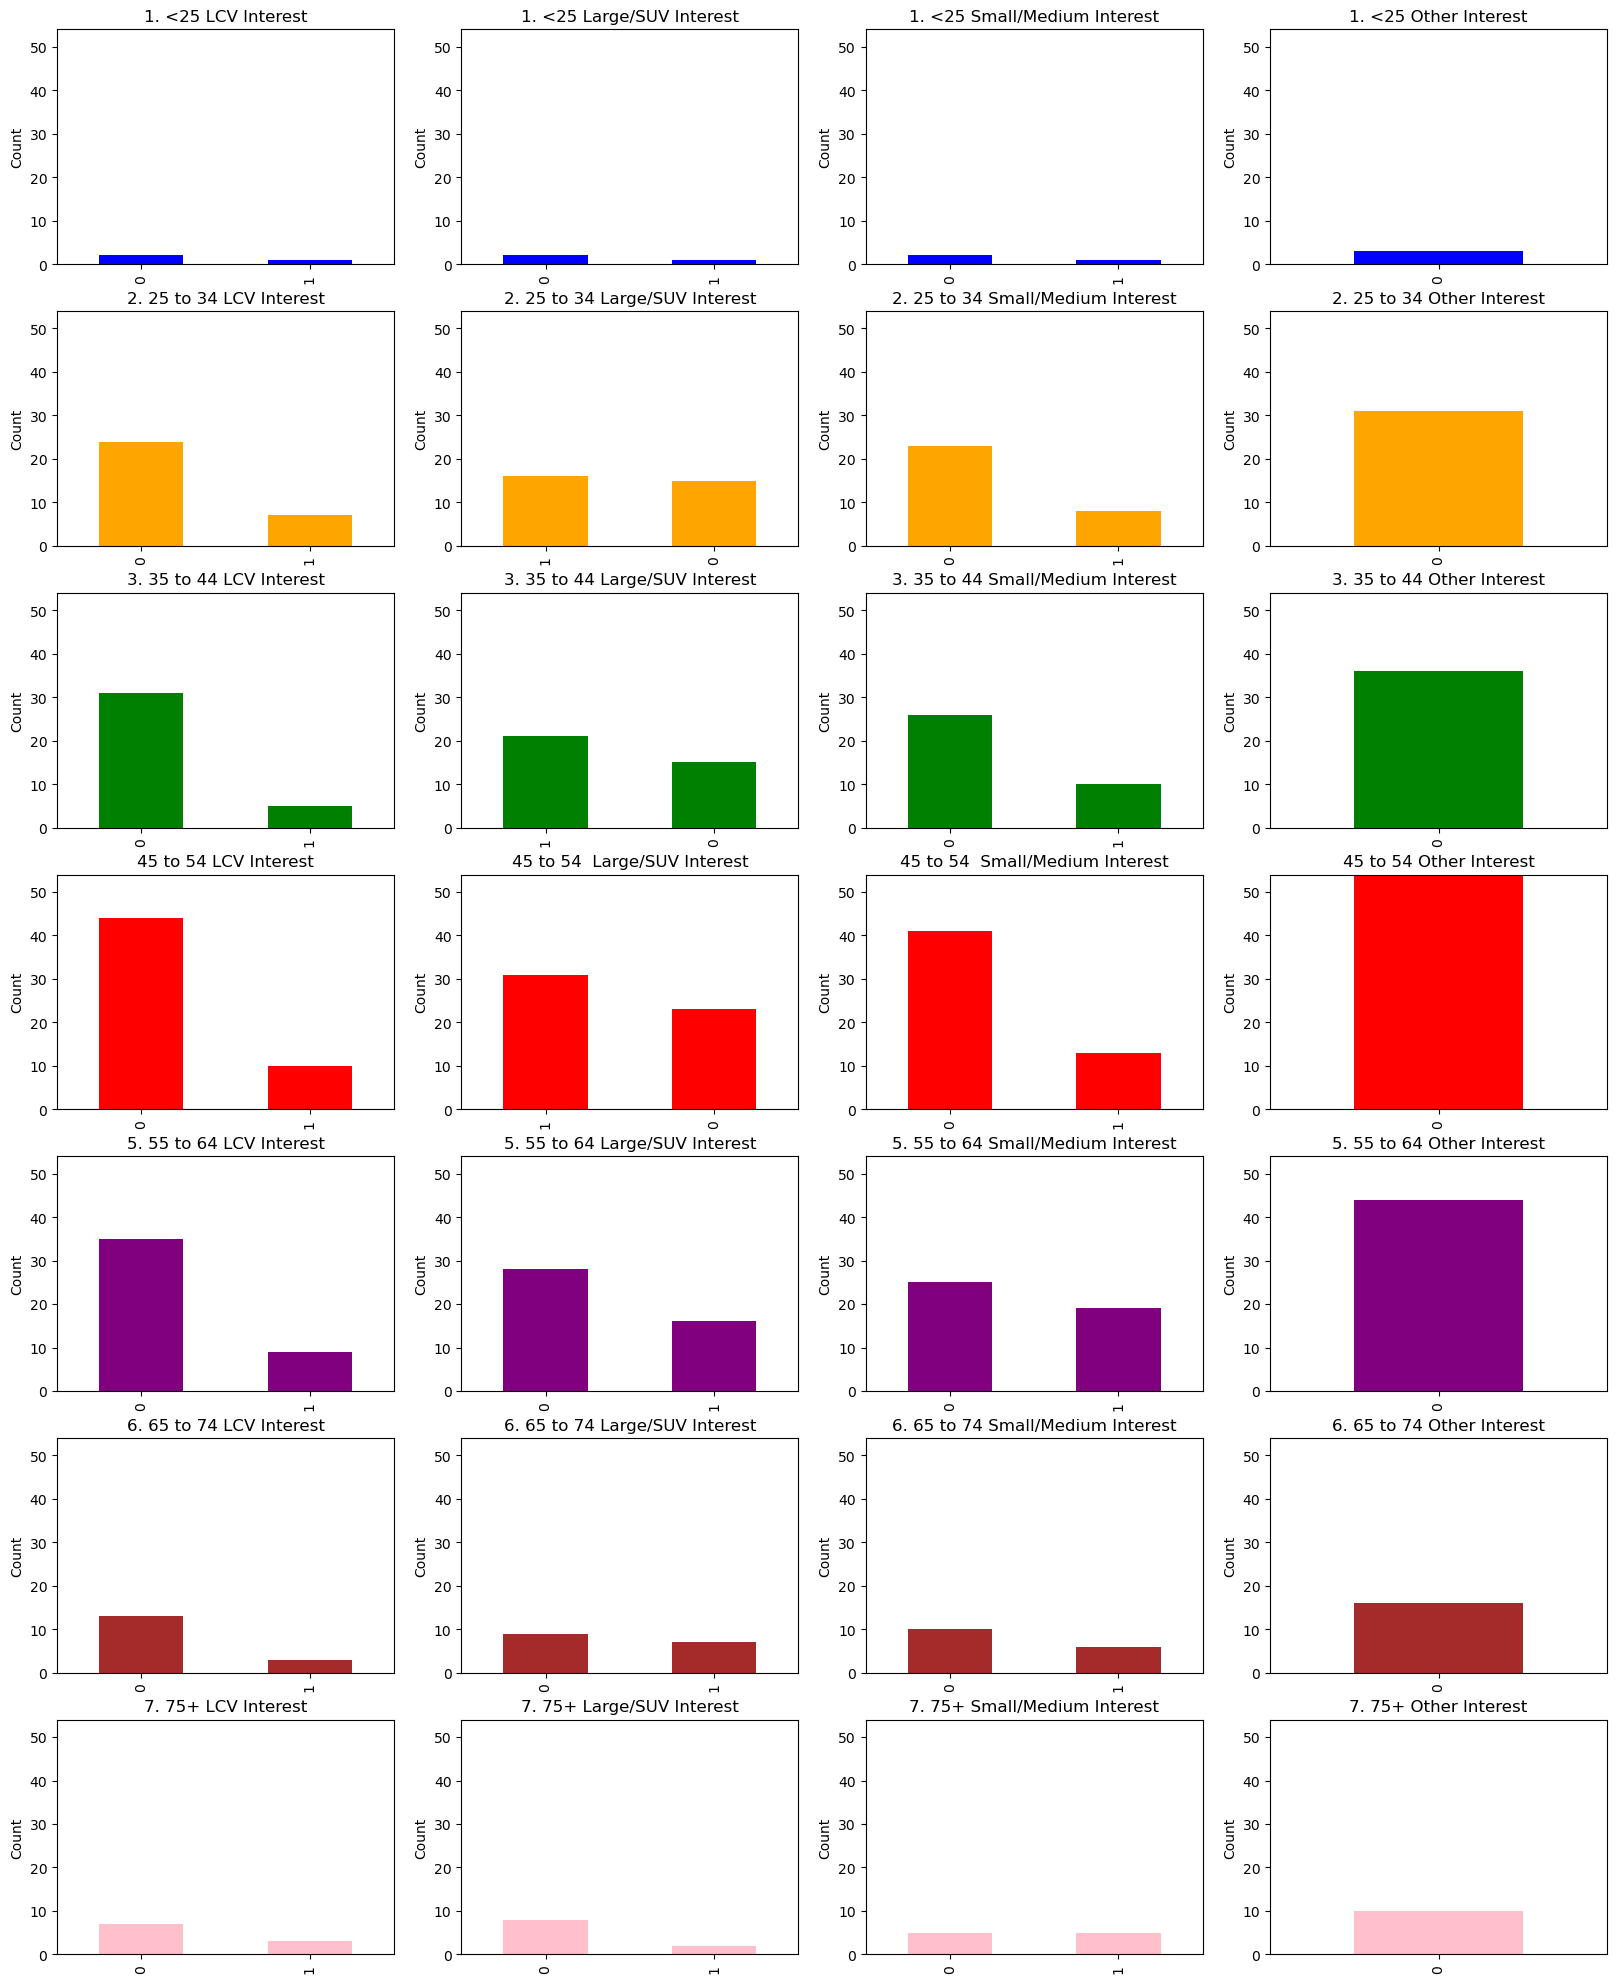

In [89]:
# For rows where Target = 1, and where corresponding age_bands = 1, display the frequency of 'LCV', 'Large/SUV', 'Small/Medium', 'Other' in a bar chart.

fig, ax = plt.subplots(7, 4, figsize=(20, 25))

max_y = cars_ALL[(cars_ALL['Target'] == 1) & (cars_ALL['4. 45 to 54'] == 1)]['Other'].value_counts().max()
        
for i in range(7):
    for j in range(4):
        ax[i][j].set_ylim([0, max_y])
        ax[i][j].set_xticklabels(['No', 'Yes'], rotation=0)
        ax[i][j].set_ylabel('Count')

cars_ALL[(cars_ALL['Target'] == 1) & (cars_ALL['1. <25'] == 1)]['LCV'].value_counts().plot(kind='bar', ax=ax[0][0], title='1. <25 LCV Interest', color='blue')
cars_ALL[(cars_ALL['Target'] == 1) & (cars_ALL['1. <25'] == 1)]['Large/SUV'].value_counts().plot(kind='bar', ax=ax[0][1], title='1. <25 Large/SUV Interest', color='blue')
cars_ALL[(cars_ALL['Target'] == 1) & (cars_ALL['1. <25'] == 1)]['Small/Medium'].value_counts().plot(kind='bar', ax=ax[0][2], title='1. <25 Small/Medium Interest', color='blue')
cars_ALL[(cars_ALL['Target'] == 1) & (cars_ALL['1. <25'] == 1)]['Other'].value_counts().plot(kind='bar', ax=ax[0][3], title='1. <25 Other Interest', color='blue')

cars_ALL[(cars_ALL['Target'] == 1) & (cars_ALL['2. 25 to 34'] == 1)]['LCV'].value_counts().plot(kind='bar', ax=ax[1][0], title='2. 25 to 34 LCV Interest', color='orange')
cars_ALL[(cars_ALL['Target'] == 1) & (cars_ALL['2. 25 to 34'] == 1)]['Large/SUV'].value_counts().plot(kind='bar', ax=ax[1][1], title='2. 25 to 34 Large/SUV Interest', color='orange')
cars_ALL[(cars_ALL['Target'] == 1) & (cars_ALL['2. 25 to 34'] == 1)]['Small/Medium'].value_counts().plot(kind='bar', ax=ax[1][2], title='2. 25 to 34 Small/Medium Interest', color='orange')
cars_ALL[(cars_ALL['Target'] == 1) & (cars_ALL['2. 25 to 34'] == 1)]['Other'].value_counts().plot(kind='bar', ax=ax[1][3], title='2. 25 to 34 Other Interest', color='orange')

cars_ALL[(cars_ALL['Target'] == 1) & (cars_ALL['3. 35 to 44'] == 1)]['LCV'].value_counts().plot(kind='bar', ax=ax[2][0], title='3. 35 to 44 LCV Interest', color='green')
cars_ALL[(cars_ALL['Target'] == 1) & (cars_ALL['3. 35 to 44'] == 1)]['Large/SUV'].value_counts().plot(kind='bar', ax=ax[2][1], title='3. 35 to 44 Large/SUV Interest', color='green')
cars_ALL[(cars_ALL['Target'] == 1) & (cars_ALL['3. 35 to 44'] == 1)]['Small/Medium'].value_counts().plot(kind='bar', ax=ax[2][2], title='3. 35 to 44 Small/Medium Interest', color='green')
cars_ALL[(cars_ALL['Target'] == 1) & (cars_ALL['3. 35 to 44'] == 1)]['Other'].value_counts().plot(kind='bar', ax=ax[2][3], title='3. 35 to 44 Other Interest', color='green')

cars_ALL[(cars_ALL['Target'] == 1) & (cars_ALL['4. 45 to 54'] == 1)]['LCV'].value_counts().plot(kind='bar', ax=ax[3][0], title='45 to 54 LCV Interest', color='red')
cars_ALL[(cars_ALL['Target'] == 1) & (cars_ALL['4. 45 to 54'] == 1)]['Large/SUV'].value_counts().plot(kind='bar', ax=ax[3][1], title='45 to 54  Large/SUV Interest', color='red')
cars_ALL[(cars_ALL['Target'] == 1) & (cars_ALL['4. 45 to 54'] == 1)]['Small/Medium'].value_counts().plot(kind='bar', ax=ax[3][2], title='45 to 54  Small/Medium Interest', color='red')
cars_ALL[(cars_ALL['Target'] == 1) & (cars_ALL['4. 45 to 54'] == 1)]['Other'].value_counts().plot(kind='bar', ax=ax[3][3], title='45 to 54 Other Interest', color='red')

cars_ALL[(cars_ALL['Target'] == 1) & (cars_ALL['5. 55 to 64'] == 1)]['LCV'].value_counts().plot(kind='bar', ax=ax[4][0], title='5. 55 to 64 LCV Interest', color='purple')
cars_ALL[(cars_ALL['Target'] == 1) & (cars_ALL['5. 55 to 64'] == 1)]['Large/SUV'].value_counts().plot(kind='bar', ax=ax[4][1], title='5. 55 to 64 Large/SUV Interest', color='purple')
cars_ALL[(cars_ALL['Target'] == 1) & (cars_ALL['5. 55 to 64'] == 1)]['Small/Medium'].value_counts().plot(kind='bar', ax=ax[4][2], title='5. 55 to 64 Small/Medium Interest', color='purple')
cars_ALL[(cars_ALL['Target'] == 1) & (cars_ALL['5. 55 to 64'] == 1)]['Other'].value_counts().plot(kind='bar', ax=ax[4][3], title='5. 55 to 64 Other Interest', color='purple')

cars_ALL[(cars_ALL['Target'] == 1) & (cars_ALL['6. 65 to 74'] == 1)]['LCV'].value_counts().plot(kind='bar', ax=ax[5][0], title='6. 65 to 74 LCV Interest', color='brown')
cars_ALL[(cars_ALL['Target'] == 1) & (cars_ALL['6. 65 to 74'] == 1)]['Large/SUV'].value_counts().plot(kind='bar', ax=ax[5][1], title='6. 65 to 74 Large/SUV Interest', color='brown')
cars_ALL[(cars_ALL['Target'] == 1) & (cars_ALL['6. 65 to 74'] == 1)]['Small/Medium'].value_counts().plot(kind='bar', ax=ax[5][2], title='6. 65 to 74 Small/Medium Interest', color='brown')
cars_ALL[(cars_ALL['Target'] == 1) & (cars_ALL['6. 65 to 74'] == 1)]['Other'].value_counts().plot(kind='bar', ax=ax[5][3], title='6. 65 to 74 Other Interest', color='brown')

cars_ALL[(cars_ALL['Target'] == 1) & (cars_ALL['7. 75+'] == 1)]['LCV'].value_counts().plot(kind='bar', ax=ax[6][0], title='7. 75+ LCV Interest', color='pink')
cars_ALL[(cars_ALL['Target'] == 1) & (cars_ALL['7. 75+'] == 1)]['Large/SUV'].value_counts().plot(kind='bar', ax=ax[6][1], title='7. 75+ Large/SUV Interest', color='pink')
cars_ALL[(cars_ALL['Target'] == 1) & (cars_ALL['7. 75+'] == 1)]['Small/Medium'].value_counts().plot(kind='bar', ax=ax[6][2], title='7. 75+ Small/Medium Interest', color='pink')
cars_ALL[(cars_ALL['Target'] == 1) & (cars_ALL['7. 75+'] == 1)]['Other'].value_counts().plot(kind='bar', ax=ax[6][3], title='7. 75+ Other Interest', color='pink')

plt.show()

> ##### Insights

- Men appear proportionately more likely to buy a second vehicle than females.

- The model most sought after by men is model [ 5 ] and [ 3 ] of [ Large/SUV ] vehicles.

- The highest age band of occurance is between 45 to 54, followed by 55 to 64.

- The most sought after car segment by 45 to 54 year olds is [ Large/SUV ] vehicles, while 55 to 64 year olds raise interest in [ Small/Medium ] vehicles. 

<br>
<br>
<br>
<br>
<br>
<br>
<br>


### Investigating the age of the vehicle, corresponding to an age brand.

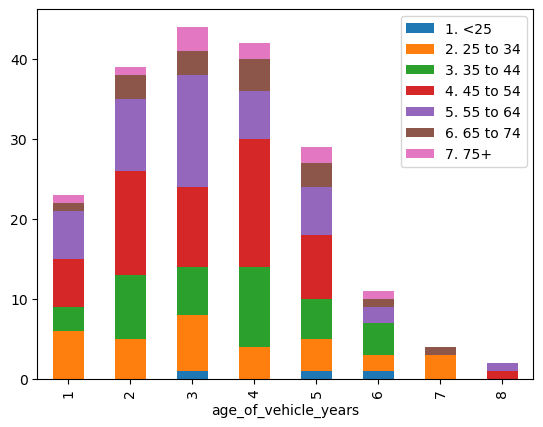

In [90]:
# Visualise how old the vehicles are before a specific age band decided to buy a new one.

cars_ALL[cars_ALL['Target'] == 1].groupby('age_of_vehicle_years')['1. <25', '2. 25 to 34', '3. 35 to 44', '4. 45 to 54', '5. 55 to 64', '6. 65 to 74', '7. 75+'].sum().plot(kind='bar', stacked=True)
plt.show()

> ##### Insights

- While not conclusive , younger customers appear more likely to hold onto an existing vehicle, for longer.

<br>
<br>
<br>
<br>
<br>
<br>
<br>


### Investigating the impact of servcing, age and total mileage on the cohort of interest.

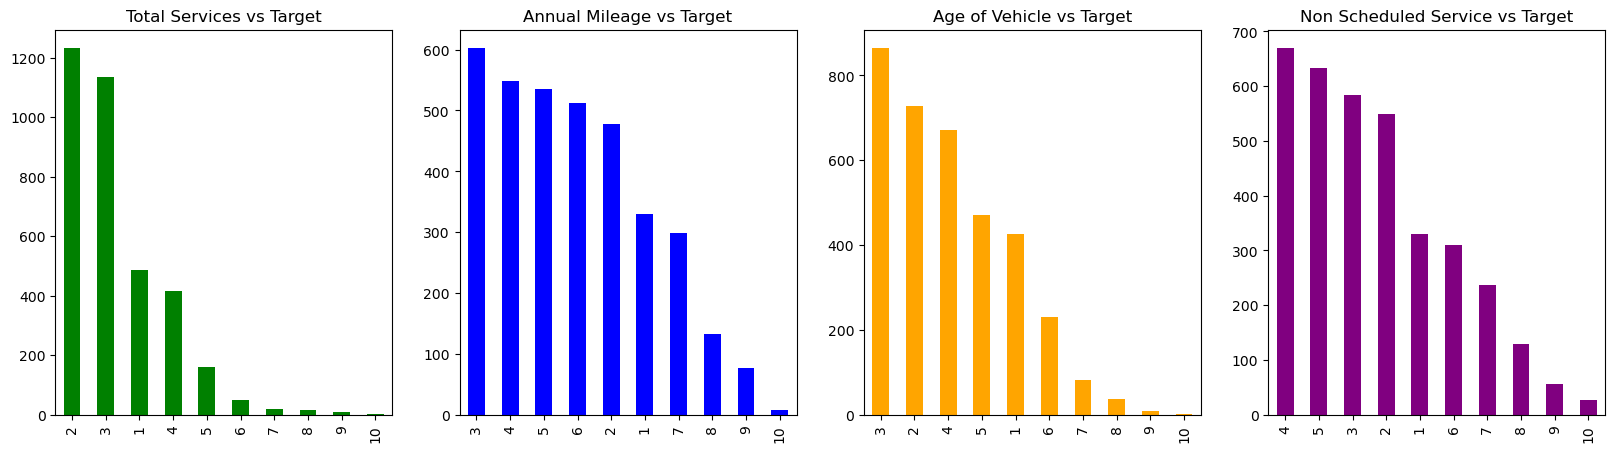

In [91]:
# Visualise total_services, annualised_mileage, age_of_vehicle and non_sched_serv_warr, against the target variable for casrs_NAG

fig, ax = plt.subplots(1, 4, figsize=(20, 5))

cars_NAG[cars_NAG['Target'] == 1]['total_services'].value_counts().plot(kind='bar', title='Total Services vs Target', color='green', ax=ax[0])
cars_NAG[cars_NAG['Target'] == 1]['annualised_mileage'].value_counts().plot(kind='bar', title='Annual Mileage vs Target', color='blue', ax=ax[1])
cars_NAG[cars_NAG['Target'] == 1]['age_of_vehicle_years'].value_counts().plot(kind='bar', title='Age of Vehicle vs Target', color='orange', ax=ax[2])
cars_NAG[cars_NAG['Target'] == 1]['non_sched_serv_warr'].value_counts().plot(kind='bar', title='Non Scheduled Service vs Target', color='purple', ax=ax[3])

plt.show()

In [92]:
# Converting car_model back to a dummy variable for machine learning

cars_ALL = pd.get_dummies(cars_ALL, columns=['car_model'])
cars_NAG = pd.get_dummies(cars_NAG, columns=['car_model'])


> ##### Insights

- The least likely a customer has to service their car overall, the more likely they are to buy a new car from this dealership.

- While not conclusive, the more a customer has to non-routinely service their vehicle, after 4 services, the less likely they are to buy a new car from this dealership.

<br>
<br>
<br>
<br>
<br>
<br>
<br>


 # Modelling



A Support Vector classification model has been selected for the modelling phase.

This kind of model finds a hyperplane to maximally separate two classes, while offers kernel functions like linear, polynomial, or radial options to better separate these classes. 

It is hoped this model will be able to find a hyperplane to separate the cohort of interest from the rest of the dataset.

<br>
<br>
<br>

## Selecting a performance metric:

Like the univariate regression model, the selected metric for assessing the model is precision. 

This examines the proportion of true positives among all positive (predictions).

In this binary classification dillema, the positive predictions are customers who are more likely to purchase a new car.

Through optimising for precision, it reduces the liklihood of targeting the wrong customer.

<br>

An alternative metric, such as recall can be considered if precisons of models are similar.

Recall examines the proportion of true positives among all actual positive outcomes.

In this binary classification circumstance, a higher recall would mean more lost opportunities for the marketing campaign. 

<br>
<br>
<br>

### Viewing the shape of both dataframes

In [93]:
# Display the shape of both datasets.

# cars_ALL.shape
cars_ALL.shape

(18289, 43)

In [94]:
# cars_NAG.shape
cars_NAG.shape

(128611, 35)

### Support Vector Classification and Machine Learning
<hr>

### Splitting datasets into X and y 

In [95]:
# Split both datasets into X and y.

# Split the cars_ALL dataset into X and y.
y_ALL = cars_ALL.pop("Target").values
X_ALL = cars_ALL.values

# Split the cars_NAG dataset into X and y.
y_NAG = cars_NAG.pop("Target").values
X_NAG = cars_NAG.values


### Splitting the data into a training and testing set

Data will be split prior to model construction. 80% of the data will be used for training, and 20% for testing.

As the  dataset is imbalanced, stratification will be integrated into each function.


In [96]:
# Establish a random state for reproducibility.
random_state = 100

# Set the test size.
test_size = 0.2

# Split the data into training and test sets, including stratification
X_train_ALL, X_test_ALL, y_train_ALL, y_test_ALL = train_test_split(X_ALL, y_ALL, test_size=test_size, random_state=random_state, stratify=y_ALL)

# Split the data into training and test sets, including stratification
X_train_NAG, X_test_NAG, y_train_NAG, y_test_NAG = train_test_split(X_NAG, y_NAG, test_size=test_size, random_state=random_state, stratify=y_NAG)



### Creating a function for Support Vector Classification

In [161]:
def ML_results(X_train, X_test, y_train, y_test, model):

    # Standardise the data.
    scaler = StandardScaler()
    X_train_s = scaler.fit_transform(X_train)
    X_test_s = scaler.transform(X_test)
    
    # Fit the model to the training data
    model.fit(X_train_s, y_train)
    
    # Make predictions on the training and test data
    y_train_pred = model.predict(X_train_s)
    y_test_pred = model.predict(X_test_s)
    

    # Display a Confusion matrix, accuracy score and f1 score
    cm_train = confusion_matrix(y_train, y_train_pred)
    ac_train = accuracy_score(y_train, y_train_pred)
    f1_train = f1_score(y_train, y_train_pred, average='weighted')
    cm_test = confusion_matrix(y_test, y_test_pred)
    ac_test = accuracy_score(y_test, y_test_pred)
    f1_test = f1_score(y_test, y_test_pred, average='weighted')


    print("Confusion matrix (training set): ")
    print(cm_train)
    print('\n')
    print("Confusion matrix (testing set): ")
    print(cm_test)
    print('\n')

    print("Accuracy (training set): ", ac_train)
    print("Accuracy (testing set): ", ac_test)
    print('\n')
    print("F1 score (training set): ", f1_train)
    print("F1 score (testing set): ", f1_test)
    print('\n')


    # Calculate precision and recall
    precision_train = round(precision_score(y_train, y_train_pred), 3)
    recall_train = round(recall_score(y_train, y_train_pred), 3)
    precision_test = round(precision_score(y_test, y_test_pred), 3)
    recall_test = round(recall_score(y_test, y_test_pred), 3)
        
    print("Precision (training set): ", precision_train)
    print("Recall (training set): ", recall_train)
    print('\n')
    print("Precision (testing set): ", precision_test)
    print("Recall (testing set): ", recall_test)
    print('\n')
    

    # Calculate recall and precision results
    if hasattr(model, "predict_proba"):  
        y_scores = model.predict_proba(X_test_s)[:, 1]
    else:  
        y_scores = model.decision_function(X_test_s)
    
    precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
    
    # Create an empty dataframe that lists the precision and recall results at each level
    results = pd.DataFrame({
        'Precision': precision,
        'Recall': recall,
    })
    
    ('\n')

    # Visualise the test data Precision-Recall curve
    plt.plot(recall, precision, label='Precision-Recall curve', color='orange', linewidth=2, alpha=0.7)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc='best')
    plt.show()

    display("0.75 Precision",results[(results["Precision"]<0.76) & (results["Precision"]>0.75)])
    display("0.8 Precision",results[(results["Precision"]<0.81) & (results["Precision"]>0.8)])
    display("0.85 Precision",results[(results["Precision"]<0.86) & (results["Precision"]>0.85)])
    display("0.9 Precision",results[(results["Precision"]<0.91) & (results["Precision"]>0.9)])
    display("0.95 Precision",results[(results["Precision"]<0.96) & (results["Precision"]>0.95)])


### Baseline (Null accuracy)

Precision in this model is not adequately-defined, as it requires both true positives and false positives to be useful. 

As the majority of the data in the cohort of interest is negative (0 value), the null accuracy would equal the proportion of negative samples.

<br>
<br>
<br>

### Training Support Vector Regression with the cars_ALL dataframe

Confusion matrix (training set): 
[[14473     3]
 [   78    77]]


Confusion matrix (testing set): 
[[3617    2]
 [  24   15]]


Accuracy (training set):  0.9944638097190897
Accuracy (testing set):  0.9928922908693275


F1 score (training set):  0.9935875273075858
F1 score (testing set):  0.9915069029749185


Precision (training set):  0.962
Recall (training set):  0.497


Precision (testing set):  0.882
Recall (testing set):  0.385




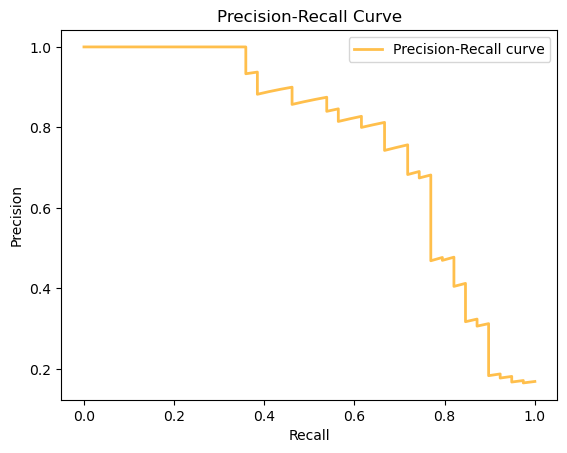

'0.75 Precision'

,Precision,Recall
194,0.756757,0.717949


'0.8 Precision'

,Precision,Recall
200,0.806452,0.641026


'0.85 Precision'

,Precision,Recall
210,0.857143,0.461538


'0.9 Precision'

,Precision,Recall


'0.95 Precision'

,Precision,Recall


In [183]:
# Fit a Support Vector Classification regression with all the variables of the dataset (with age and gender)
ML_results(X_train_ALL, X_test_ALL, y_train_ALL, y_test_ALL, SVC())

<br>
<br>

> ##### Insights

Precision: 0.882

Recall: 0.385

<br>
<br>
<br>

### Training a Support Vector regression with the cars_NAG dataframe.

Confusion matrix (training set): 
[[99982    89]
 [ 1457  1360]]


Confusion matrix (testing set): 
[[24995    24]
 [  377   327]]


Accuracy (training set):  0.9849739522587668
Accuracy (testing set):  0.9844108385491583


F1 score (training set):  0.9826157165395958
F1 score (testing set):  0.9818573967495613


Precision (training set):  0.939
Recall (training set):  0.483


Precision (testing set):  0.932
Recall (testing set):  0.464




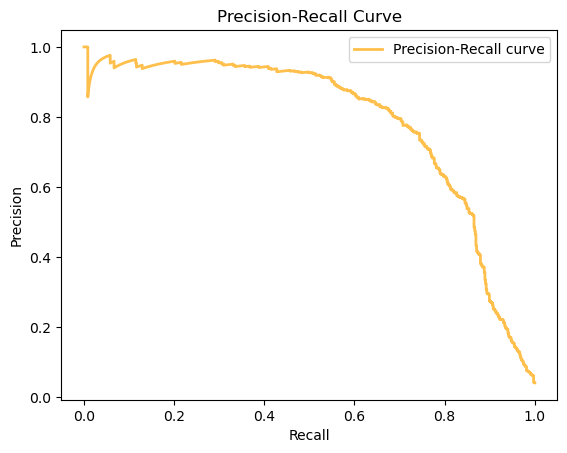

'0.75 Precision'

,Precision,Recall
16172,0.750716,0.744318
16173,0.751793,0.744318
16174,0.752874,0.744318
16175,0.753957,0.744318
16176,0.753602,0.742898
16177,0.753247,0.741477
16178,0.752890,0.740057
16179,0.752533,0.738636
16180,0.753623,0.738636
16181,0.754717,0.738636


'0.8 Precision'

,Precision,Recall
16263,0.800659,0.690341
16264,0.800330,0.688920
16265,0.801653,0.688920
16266,0.801325,0.687500
16267,0.802653,0.687500
16268,0.802326,0.686080
16269,0.803661,0.686080
16270,0.803333,0.684659
16271,0.804674,0.684659
16272,0.806020,0.684659


'0.85 Precision'

,Precision,Recall
16347,0.850860,0.632102
16348,0.850575,0.630682
16349,0.850288,0.629261
16353,0.851064,0.625000
16354,0.850775,0.623580
16355,0.850485,0.622159
16356,0.852140,0.622159
16357,0.851852,0.620739
16358,0.851562,0.619318
16359,0.851272,0.617898


'0.9 Precision'

,Precision,Recall
16436,0.900922,0.555398
16437,0.900693,0.553977
16438,0.900463,0.552557
16439,0.900232,0.551136
16440,0.902326,0.551136
16441,0.902098,0.549716
16442,0.904206,0.549716
16443,0.906323,0.549716
16444,0.906103,0.548295
16445,0.908235,0.548295


'0.95 Precision'

,Precision,Recall
16625,0.951020,0.330966
16626,0.950820,0.329545
16627,0.950617,0.328125
16628,0.950413,0.326705
16629,0.950207,0.325284
...,...,...
16827,0.953488,0.058239
16846,0.958333,0.032670
16847,0.956522,0.031250
16848,0.954545,0.029830


In [184]:
# Fit a Support Vector Classification regression with all the variables of the dataset without age and gender.
ML_results(X_train_NAG, X_test_NAG, y_train_NAG, y_test_NAG, SVC())

<br>
<br>

> ##### Insights

Precision: 0.932

Recall: 0.464

<br>
<br>
<br>

### Hyperparameter Tuning the cars_NAG dataframe.

In [162]:
def ML_results_cv(X_train, X_test, y_train, y_test, hyperparameters_dict, model, search_type="grid"):
    
    # Standardise the data
    scaler = StandardScaler()

    X_train_s = scaler.fit_transform(X_train)
    X_test_s = scaler.transform(X_test)
    


    # Define the hyperparameters
    hyperparameters = hyperparameters_dict
    
    if search_type == "grid":
        # Grid search
        search = GridSearchCV(model, hyperparameters, cv=5, n_jobs=-1)
    elif search_type == "random":
        # Randomized search
        search = RandomizedSearchCV(model, hyperparameters, cv=5, n_jobs=-1)
    else:
        raise ValueError("Invalid. Select 'grid' or 'random'.")
    


    # Fit the search to the training data
    search.fit(X_train_s, y_train)
    
    # Make predictions on the training and test data using the best model found by the search
    model = search.best_estimator_

    print("Best performing parameters: ",model)
    
    y_train_pred = model.predict(X_train_s)
    y_test_pred = model.predict(X_test_s)
    


    # Display a Confusion matrix, accuracy score and f1 score
    cm_train = confusion_matrix(y_train, y_train_pred)
    ac_train = accuracy_score(y_train, y_train_pred)
    f1_train = f1_score(y_train, y_train_pred, average='weighted')
    cm_test = confusion_matrix(y_test, y_test_pred)
    ac_test = accuracy_score(y_test, y_test_pred)
    f1_test = f1_score(y_test, y_test_pred, average='weighted')


    print("Confusion matrix (training set): ")
    print(cm_train)
    print('\n')
    print("Confusion matrix (testing set): ")
    print(cm_test)
    print('\n')

    print("Accuracy (training set): ", ac_train)
    print("Accuracy (testing set): ", ac_test)
    print('\n')
    print("F1 score (training set): ", f1_train)
    print("F1 score (testing set): ", f1_test)
    print('\n')



    # Calculate precision and recall
    precision_train = round(precision_score(y_train, y_train_pred), 3)
    recall_train = round(recall_score(y_train, y_train_pred), 3)
    precision_test = round(precision_score(y_test, y_test_pred), 3)
    recall_test = round(recall_score(y_test, y_test_pred), 3)
        
    print("Precision (training set): ", precision_train)
    print("Recall (training set): ", recall_train)
    print('\n')
    print("Precision (testing set): ", precision_test)
    print("Recall (testing set): ", recall_test)
    print('\n')
    
    
    # Calculate recall and precision results
    if hasattr(model, "predict_proba"):  # use predict_proba if available
        y_scores = model.predict_proba(X_test_s)[:, 1]
    else:  # use decision_function otherwise
        y_scores = model.decision_function(X_test_s)
    
    precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
    

    # Create an empty dataframe that lists the precision and recall results at each level
    results = pd.DataFrame({
        'Precision': precision,
        'Recall': recall,
    })
    
    # Visualise the test data Precision-Recall curve, and recall the results of the dataframe.
    plt.plot(recall, precision, label='Precision-Recall Curve', color='red', linewidth=2, alpha=0.7)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc='best')
    plt.show()

    display("0.75 Precision",results[(results["Precision"]<0.76) & (results["Precision"]>0.75)])
    display("0.8 Precision",results[(results["Precision"]<0.81) & (results["Precision"]>0.8)])
    display("0.85 Precision",results[(results["Precision"]<0.86) & (results["Precision"]>0.85)])
    display("0.9 Precision",results[(results["Precision"]<0.91) & (results["Precision"]>0.9)])
    display("0.95 Precision",results[(results["Precision"]<0.96) & (results["Precision"]>0.95)])


Best performing parameters:  SVC(C=100)
Confusion matrix (training set): 
[[99941   130]
 [  705  2112]]


Confusion matrix (testing set): 
[[24967    52]
 [  210   494]]


Accuracy (training set):  0.9918843791307053
Accuracy (testing set):  0.9898145628425923


F1 score (training set):  0.9914347976922172
F1 score (testing set):  0.9891868733667549


Precision (training set):  0.942
Recall (training set):  0.75


Precision (testing set):  0.905
Recall (testing set):  0.702




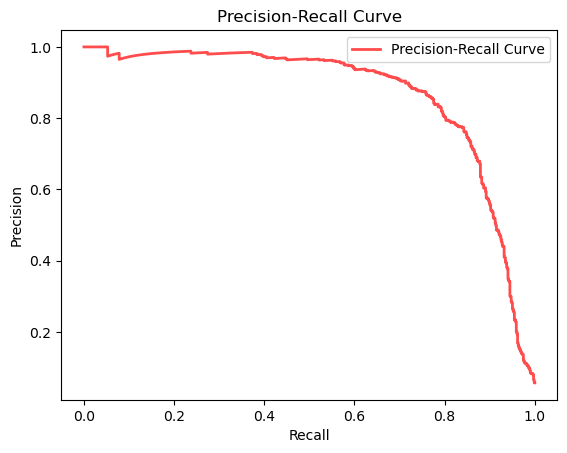

'0.75 Precision'

,Precision,Recall
11521,0.750314,0.849432
11522,0.751256,0.849432
11523,0.752201,0.849432
11524,0.753149,0.849432
11525,0.752837,0.848011
11526,0.753788,0.848011
11527,0.754741,0.848011
11528,0.755696,0.848011
11529,0.756654,0.848011
11530,0.757614,0.848011


'0.8 Precision'

,Precision,Recall
11612,0.800283,0.802557
11613,0.801418,0.802557
11614,0.801136,0.801136
11615,0.802276,0.801136
11616,0.803419,0.801136
11617,0.803138,0.799716
11618,0.804286,0.799716
11619,0.805436,0.799716
11620,0.805158,0.798295
11621,0.806313,0.798295


'0.85 Precision'

,Precision,Recall
11676,0.850467,0.775568
11677,0.851794,0.775568
11678,0.853125,0.775568
11679,0.852895,0.774148
11680,0.854232,0.774148
11681,0.854003,0.772727
11682,0.855346,0.772727
11683,0.856693,0.772727
11684,0.856467,0.771307
11685,0.856240,0.769886


'0.9 Precision'

,Precision,Recall
11761,0.901257,0.713068
11762,0.902878,0.713068
11763,0.904505,0.713068
11764,0.904332,0.711648
11765,0.904159,0.710227
11766,0.903986,0.708807
11767,0.903811,0.707386
11768,0.903636,0.705966
11769,0.903461,0.704545
11770,0.905109,0.704545


'0.95 Precision'

,Precision,Recall
11890,0.950935,0.578125
11891,0.950820,0.576705
11892,0.953052,0.576705
11893,0.955294,0.576705
11894,0.955189,0.575284
11895,0.955083,0.573864
11896,0.954976,0.572443
11897,0.954869,0.571023
11898,0.954762,0.569602
11899,0.957041,0.569602


In [186]:
# Create hyperparameter dictionary.

hyperparameters_dict = {
    'C': [1, 10, 50, 100],
    'kernel': ['rbf']
}

ML_results_cv(X_train_NAG, X_test_NAG, y_train_NAG, y_test_NAG, hyperparameters_dict, SVC(), search_type="grid")

<br>
<br>

> ##### Insights

Precision: 0.905

Recall: 0.702

<br>
<br>
<br>

Best performing parameters:  SVC(C=300, kernel='sigmoid')
Confusion matrix (training set): 
[[97417  2654]
 [ 2663   154]]
Confusion matrix (testing set): 
[[24321   698]
 [  671    33]]
Accuracy (training set):  0.9483224477101314
Accuracy (testing set):  0.9467791470668273
F1 score (training set):  0.948282267536016
F1 score (testing set):  0.9472654645794569
Precision (training set): 0.055
Recall (training set): 0.055
Precision (test set): 0.045
Recall (test set): 0.047


'0.6 Precision'

,Precision,Recall


'0.7 Precision'

,Precision,Recall


'0.75 Precision'

,Precision,Recall


'0.8 Precision'

,Precision,Recall


'0.85 Precision'

,Precision,Recall


'0.90 Precision'

,Precision,Recall


'0.95 Precision'

,Precision,Recall


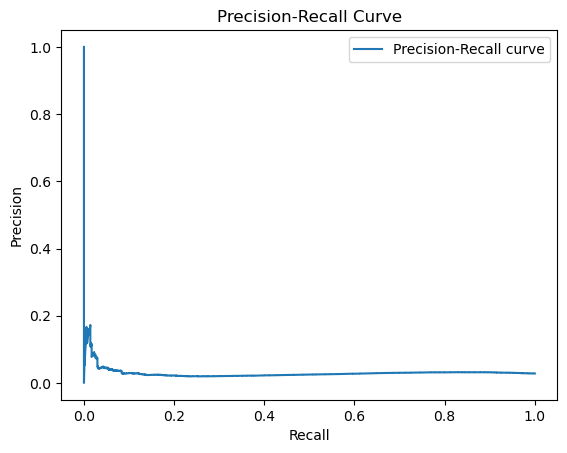

In [132]:
# Create hyperparameter dictionary.

hyperparameters_dict = {
    'C': [100, 200, 300],
    'kernel': ['sigmoid']
}

ML_results_cv(X_train_NAG, X_test_NAG, y_train_NAG, y_test_NAG, hyperparameters_dict, SVC(), search_type="grid")

<br>
<br>

> ##### Insights

Precision: 0.045

Recall: 0.047

<br>
<br>
<br>

Best performing parameters:  SVC(C=200, kernel='poly')
Confusion matrix (training set): 
[[99932   139]
 [  728  2089]]
Confusion matrix (testing set): 
[[24951    68]
 [  200   504]]
Accuracy (training set):  0.9915733613249359
Accuracy (testing set):  0.9895813085565447
F1 score (training set):  0.9910938224626253
F1 score (testing set):  0.9890561167953229
Precision (training set): 0.938
Recall (training set): 0.742
Precision (test set): 0.881
Recall (test set): 0.716


'0.6 Precision'

,Precision,Recall
22232,0.600386,0.883523
22233,0.600966,0.883523
22234,0.601547,0.883523
22235,0.602130,0.883523
22236,0.602713,0.883523
22237,0.603298,0.883523
22238,0.603883,0.883523
22239,0.604470,0.883523
22240,0.605058,0.883523
22241,0.605648,0.883523


'0.7 Precision'

,Precision,Recall
22427,0.700357,0.836648
22428,0.701190,0.836648
22429,0.702026,0.836648
22430,0.702864,0.836648
22431,0.703704,0.836648
22432,0.703349,0.835227
22433,0.702994,0.833807
22434,0.703837,0.833807
22435,0.704682,0.833807
22436,0.705529,0.833807


'0.75 Precision'

,Precision,Recall
22495,0.750323,0.823864
22497,0.750973,0.822443
22498,0.751948,0.822443
22499,0.752926,0.822443
22500,0.753906,0.822443
22501,0.754889,0.822443
22502,0.755875,0.822443
22503,0.756863,0.822443
22504,0.756545,0.821023
22505,0.756225,0.819602


'0.8 Precision'

,Precision,Recall
22232,0.600386,0.883523
22233,0.600966,0.883523
22234,0.601547,0.883523
22235,0.602130,0.883523
22236,0.602713,0.883523
...,...,...
22577,0.806078,0.791193
22578,0.807246,0.791193
22579,0.806967,0.789773
22580,0.808140,0.789773


'0.85 Precision'

,Precision,Recall
22427,0.700357,0.836648
22428,0.701190,0.836648
22429,0.702026,0.836648
22430,0.702864,0.836648
22431,0.703704,0.836648
...,...,...
22644,0.857372,0.759943
22645,0.857143,0.758523
22646,0.858521,0.758523
22647,0.859903,0.758523


'0.90 Precision'

,Precision,Recall
22427,0.700357,0.836648
22428,0.701190,0.836648
22429,0.702026,0.836648
22430,0.702864,0.836648
22431,0.703704,0.836648
...,...,...
22749,0.909441,0.670455
22757,0.909980,0.660511
22758,0.909804,0.659091
22759,0.909627,0.657670


'0.95 Precision'

,Precision,Recall
22427,0.700357,0.836648
22428,0.701190,0.836648
22429,0.702026,0.836648
22430,0.702864,0.836648
22431,0.703704,0.836648
...,...,...
23223,0.955556,0.061080
23224,0.954545,0.059659
23225,0.953488,0.058239
23226,0.952381,0.056818


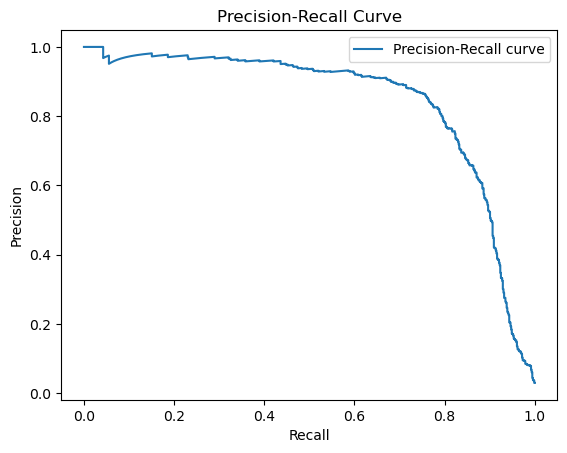

In [133]:
# Create hyperparameter dictionary.

hyperparameters_dict = {
    'C': [50, 100, 200, 300],
    'kernel': ['poly']
}

ML_results_cv(X_train_NAG, X_test_NAG, y_train_NAG, y_test_NAG, hyperparameters_dict, SVC(), search_type="grid")

<br>
<br>

> ##### Insights

Precision: 0.881

Recall: 0.716

<br>
<br>
<br>

Best performing parameters:  SVC(C=200)
Confusion matrix (training set): 
[[99951   120]
 [  619  2198]]


Confusion matrix (testing set): 
[[24967    52]
 [  188   516]]


Accuracy (training set):  0.9928174325480134
Accuracy (testing set):  0.9906698285580997


F1 score (training set):  0.9924773767204644
F1 score (testing set):  0.9901836908365229


Precision (training set):  0.948
Recall (training set):  0.78


Precision (testing set):  0.908
Recall (testing set):  0.733




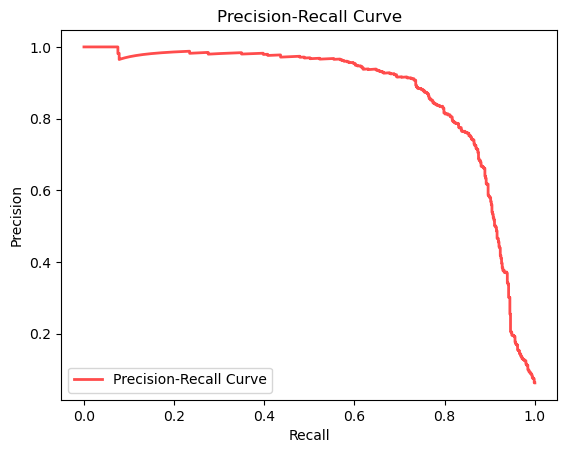

'0.75 Precision'

,Precision,Recall
10297,0.750311,0.857955
10298,0.751244,0.857955
10299,0.750934,0.856534
10300,0.751870,0.856534
10301,0.752809,0.856534
10302,0.752500,0.855114
10303,0.752190,0.853693
10304,0.753133,0.853693
10305,0.754078,0.853693
10306,0.755025,0.853693


'0.8 Precision'

,Precision,Recall
10384,0.800836,0.816761
10385,0.801953,0.816761
10386,0.803073,0.816761
10387,0.804196,0.816761
10388,0.803922,0.815341
10389,0.805049,0.815341
10390,0.804775,0.813920
10391,0.805907,0.813920
10392,0.805634,0.812500
10393,0.806770,0.812500


'0.85 Precision'

,Precision,Recall
10463,0.851330,0.772727
10464,0.851097,0.771307
10465,0.852433,0.771307
10466,0.852201,0.769886
10467,0.851969,0.768466
10468,0.853312,0.768466
10469,0.854660,0.768466
10470,0.856013,0.768466
10471,0.855784,0.767045
10472,0.855556,0.765625


'0.9 Precision'

,Precision,Recall
10527,0.900870,0.735795
10528,0.902439,0.735795
10529,0.904014,0.735795
10530,0.905594,0.735795
10531,0.907180,0.735795
10532,0.907018,0.734375
10533,0.906854,0.732955
10534,0.908451,0.732955
10535,0.908289,0.731534
10536,0.909894,0.731534


'0.95 Precision'

,Precision,Recall
10656,0.950673,0.602273
10657,0.952809,0.602273
10658,0.952703,0.600852
10659,0.952596,0.599432
10660,0.954751,0.599432
10661,0.954649,0.598011
10662,0.954545,0.596591
10663,0.956720,0.596591
10664,0.956621,0.595170
10665,0.956522,0.593750


In [185]:
# Create hyperparameter dictionary.

hyperparameters_dict = {
    'C': [50, 100, 200, 300],
    'kernel': ['rbf'],
    'gamma': ['scale', 'auto']
}

ML_results_cv(X_train_NAG, X_test_NAG, y_train_NAG, y_test_NAG, hyperparameters_dict, SVC(), search_type="grid")

<br>
<br>

> ##### Insights

Precision: 0.908

Recall: 0.733

<br>
<br>
<br>

Best performing parameters:  SVC(C=50, gamma=0.1)
Confusion matrix (training set): 
[[100002     69]
 [   392   2425]]
Confusion matrix (testing set): 
[[24948    71]
 [  190   514]]
Accuracy (training set):  0.9955193997356349
Accuracy (testing set):  0.9898534385569335
F1 score (training set):  0.9953867607095509
F1 score (testing set):  0.9893971117830704
Precision (training set): 0.972
Recall (training set): 0.861
Precision (test set): 0.879
Recall (test set): 0.73


'0.6 Precision'

,Precision,Recall
12342,0.600580,0.882102
12343,0.601162,0.882102
12344,0.601744,0.882102
12345,0.602328,0.882102
12346,0.602913,0.882102
12347,0.603499,0.882102
12348,0.603113,0.880682
12349,0.603700,0.880682
12350,0.604288,0.880682
12351,0.604878,0.880682


'0.7 Precision'

,Precision,Recall
12519,0.700117,0.852273
12522,0.700234,0.849432
12523,0.701055,0.849432
12524,0.701878,0.849432
12525,0.702703,0.849432
12526,0.703529,0.849432
12527,0.704358,0.849432
12528,0.705189,0.849432
12529,0.706021,0.849432
12530,0.706856,0.849432


'0.75 Precision'

,Precision,Recall
12595,0.750320,0.832386
12596,0.751282,0.832386
12597,0.752246,0.832386
12598,0.753213,0.832386
12599,0.754183,0.832386
12600,0.755155,0.832386
12601,0.756129,0.832386
12602,0.757106,0.832386
12603,0.756792,0.830966
12604,0.757772,0.830966


'0.8 Precision'

,Precision,Recall
12342,0.600580,0.882102
12343,0.601162,0.882102
12344,0.601744,0.882102
12345,0.602328,0.882102
12346,0.602913,0.882102
...,...,...
12671,0.807092,0.808239
12672,0.806818,0.806818
12673,0.807966,0.806818
12674,0.809117,0.806818


'0.85 Precision'

,Precision,Recall
12519,0.700117,0.852273
12522,0.700234,0.849432
12523,0.701055,0.849432
12524,0.701878,0.849432
12525,0.702703,0.849432
...,...,...
12755,0.856683,0.755682
12756,0.858065,0.755682
12757,0.857835,0.754261
12758,0.857605,0.752841


'0.90 Precision'

,Precision,Recall
12519,0.700117,0.852273
12522,0.700234,0.849432
12523,0.701055,0.849432
12524,0.701878,0.849432
12525,0.702703,0.849432
...,...,...
12839,0.905028,0.690341
12840,0.906716,0.690341
12841,0.906542,0.688920
12842,0.908240,0.688920


'0.95 Precision'

,Precision,Recall
12519,0.700117,0.852273
12522,0.700234,0.849432
12523,0.701055,0.849432
12524,0.701878,0.849432
12525,0.702703,0.849432
...,...,...
12989,0.958656,0.526989
12990,0.958549,0.525568
12991,0.958442,0.524148
12992,0.958333,0.522727


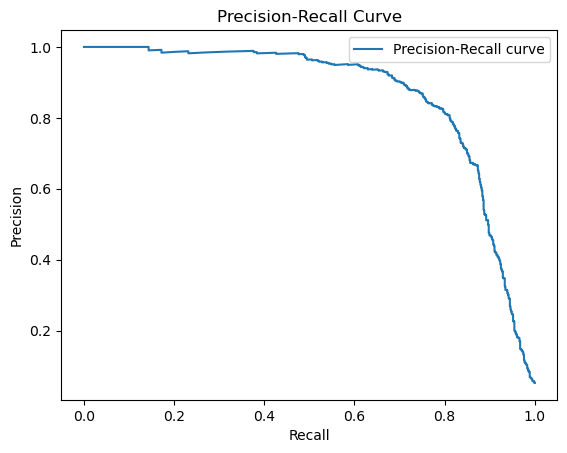

In [136]:
# Create hyperparameter dictionary for C with L2 penalty

hyperparameters_dict = {
    'C': [50, 100, 200, 300],
    'kernel': ['rbf'],
    'gamma': [0.1]
}

ML_results_cv(X_train_NAG, X_test_NAG, y_train_NAG, y_test_NAG, hyperparameters_dict, SVC(), search_type="grid")

<br>
<br>

> ##### Insights

Precision: 0.879

Recall: 0.73

<br>
<br>
<br>

Best performing parameters:  SVC(C=20, gamma=0.1)
Confusion matrix (training set): 
[[99976    95]
 [  527  2290]]
Confusion matrix (testing set): 
[[24960    59]
 [  199   505]]
Accuracy (training set):  0.9939545914003577
Accuracy (testing set):  0.9899700656999573
F1 score (training set):  0.9937100813306391
F1 score (testing set):  0.9894303547984784
Precision (training set): 0.96
Recall (training set): 0.813
Precision (test set): 0.895
Recall (test set): 0.717


'0.6 Precision'

,Precision,Recall
17843,0.600191,0.893466
17844,0.600764,0.893466
17845,0.601338,0.893466
17846,0.601914,0.893466
17847,0.602490,0.893466
17848,0.603068,0.893466
17849,0.603647,0.893466
17850,0.604227,0.893466
17851,0.604808,0.893466
17852,0.605390,0.893466


'0.7 Precision'

,Precision,Recall
18023,0.700461,0.863636
18024,0.701269,0.863636
18025,0.700924,0.862216
18026,0.701734,0.862216
18027,0.702546,0.862216
18028,0.703360,0.862216
18029,0.704176,0.862216
18030,0.703833,0.860795
18031,0.704651,0.860795
18032,0.705471,0.860795


'0.75 Precision'

,Precision,Recall
18104,0.750953,0.839489
18105,0.751908,0.839489
18106,0.751592,0.838068
18107,0.752551,0.838068
18108,0.752235,0.836648
18109,0.751918,0.835227
18110,0.752881,0.835227
18111,0.753846,0.835227
18112,0.753530,0.833807
18113,0.754499,0.833807


'0.8 Precision'

,Precision,Recall
17843,0.600191,0.893466
17844,0.600764,0.893466
17845,0.601338,0.893466
17846,0.601914,0.893466
17847,0.602490,0.893466
...,...,...
18193,0.808023,0.801136
18194,0.809182,0.801136
18195,0.808908,0.799716
18197,0.809798,0.798295


'0.85 Precision'

,Precision,Recall
18023,0.700461,0.863636
18024,0.701269,0.863636
18025,0.700924,0.862216
18026,0.701734,0.862216
18027,0.702546,0.862216
...,...,...
18263,0.858280,0.765625
18264,0.858054,0.764205
18265,0.857827,0.762784
18266,0.859200,0.762784


'0.90 Precision'

,Precision,Recall
18023,0.700461,0.863636
18024,0.701269,0.863636
18025,0.700924,0.862216
18026,0.701734,0.862216
18027,0.702546,0.862216
...,...,...
18344,0.906764,0.704545
18345,0.906593,0.703125
18346,0.908257,0.703125
18347,0.909926,0.703125


'0.95 Precision'

,Precision,Recall
18023,0.700461,0.863636
18024,0.701269,0.863636
18025,0.700924,0.862216
18026,0.701734,0.862216
18027,0.702546,0.862216
...,...,...
18480,0.958637,0.559659
18481,0.958537,0.558239
18482,0.958435,0.556818
18483,0.958333,0.555398


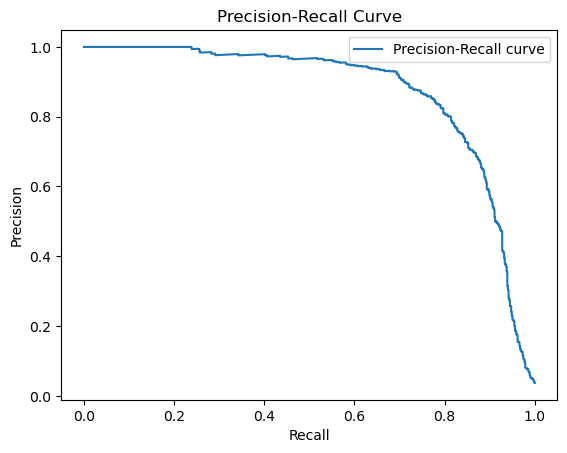

In [138]:
# Create hyperparameter dictionary for C with L2 penalty

hyperparameters_dict = {
    'C': [10, 20, 30, 40, 50],
    'kernel': ['rbf'],
    'gamma': [0.1]
}

ML_results_cv(X_train_NAG, X_test_NAG, y_train_NAG, y_test_NAG, hyperparameters_dict, SVC(), search_type="grid")

<br>
<br>

> ##### Insights

Precision: 0.895

Recall: 0.717

<br>
<br>
<br>

Best performing parameters:  SVC(C=20, gamma=0.01)
Confusion matrix (training set): 
[[99924   147]
 [ 1207  1610]]
Confusion matrix (testing set): 
[[24981    38]
 [  308   396]]
Accuracy (training set):  0.9868400590933831
Accuracy (testing set):  0.9865490028379271
F1 score (training set):  0.985349851689258
F1 score (testing set):  0.9849894175002685
Precision (training set): 0.916
Recall (training set): 0.572
Precision (test set): 0.912
Recall (test set): 0.562


'0.6 Precision'

,Precision,Recall
11111,0.600404,0.84517
11112,0.601010,0.84517
11113,0.600607,0.84375
11114,0.601215,0.84375
11115,0.601824,0.84375
11116,0.602434,0.84375
11117,0.602030,0.84233
11118,0.602642,0.84233
11119,0.603255,0.84233
11120,0.603870,0.84233


'0.7 Precision'

,Precision,Recall
11295,0.700124,0.802557
11296,0.700993,0.802557
11297,0.701863,0.802557
11298,0.702736,0.802557
11299,0.703611,0.802557
11300,0.704489,0.802557
11301,0.704120,0.801136
11302,0.705000,0.801136
11303,0.705882,0.801136
11304,0.706767,0.801136


'0.75 Precision'

,Precision,Recall
11381,0.750347,0.768466
11382,0.751389,0.768466
11383,0.752434,0.768466
11384,0.753482,0.768466
11385,0.754533,0.768466
11386,0.755587,0.768466
11387,0.756643,0.768466
11388,0.757703,0.768466
11389,0.758766,0.768466
11390,0.759831,0.768466


'0.8 Precision'

,Precision,Recall
11111,0.600404,0.845170
11112,0.601010,0.845170
11113,0.600607,0.843750
11114,0.601215,0.843750
11115,0.601824,0.843750
...,...,...
11454,0.805556,0.741477
11455,0.806801,0.741477
11456,0.808050,0.741477
11457,0.807752,0.740057


'0.85 Precision'

,Precision,Recall
11295,0.700124,0.802557
11296,0.700993,0.802557
11297,0.701863,0.802557
11298,0.702736,0.802557
11299,0.703611,0.802557
...,...,...
11565,0.854749,0.651989
11566,0.856343,0.651989
11567,0.857944,0.651989
11568,0.857678,0.650568


'0.90 Precision'

,Precision,Recall
11295,0.700124,0.802557
11296,0.700993,0.802557
11297,0.701863,0.802557
11298,0.702736,0.802557
11299,0.703611,0.802557
...,...,...
11657,0.907865,0.573864
11658,0.909910,0.573864
11659,0.909707,0.572443
11660,0.909502,0.571023


'0.95 Precision'

,Precision,Recall
11295,0.700124,0.802557
11296,0.700993,0.802557
11297,0.701863,0.802557
11298,0.702736,0.802557
11299,0.703611,0.802557
...,...,...
12087,0.933333,0.019886
12088,0.928571,0.018466
12089,0.923077,0.017045
12090,0.916667,0.015625


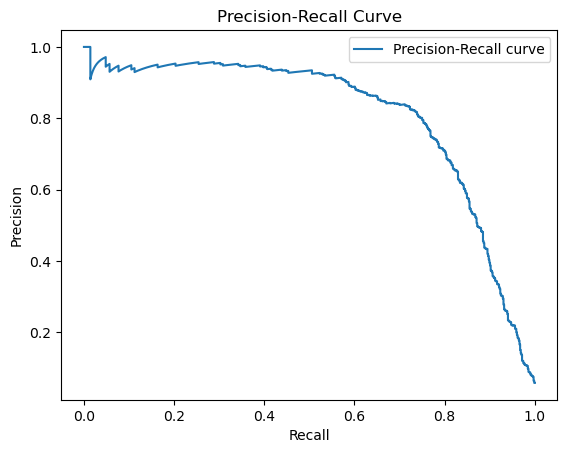

In [139]:
# Create hyperparameter dictionary for C with L2 penalty

hyperparameters_dict = {
    'C': [1, 5, 10, 20],
    'kernel': ['rbf'],
    'gamma': [0.01]
}

ML_results_cv(X_train_NAG, X_test_NAG, y_train_NAG, y_test_NAG, hyperparameters_dict, SVC(), search_type="grid")

<br>
<br>

> ##### Insights

Precision: 0.912

Recall: 0.562

<br>
<br>
<br>

Best performing parameters:  SVC(C=15, gamma=0.1)
Confusion matrix (training set): 
[[99972    99]
 [  571  2246]]
Confusion matrix (testing set): 
[[24964    55]
 [  204   500]]
Accuracy (training set):  0.9934880646917036
Accuracy (testing set):  0.989931189985616
F1 score (training set):  0.9931980079515882
F1 score (testing set):  0.9893503253761957
Precision (training set): 0.958
Recall (training set): 0.797
Precision (test set): 0.901
Recall (test set): 0.71


'0.6 Precision'

,Precision,Recall
20086,0.600189,0.901989
20087,0.600757,0.901989
20088,0.601326,0.901989
20089,0.601896,0.901989
20090,0.602467,0.901989
20091,0.603039,0.901989
20092,0.603612,0.901989
20093,0.604186,0.901989
20094,0.604762,0.901989
20095,0.605338,0.901989


'0.7 Precision'

,Precision,Recall
20276,0.700461,0.863636
20277,0.700115,0.862216
20278,0.700924,0.862216
20279,0.701734,0.862216
20280,0.702546,0.862216
20281,0.702202,0.860795
20282,0.703016,0.860795
20283,0.703833,0.860795
20284,0.703488,0.859375
20285,0.704307,0.859375


'0.75 Precision'

,Precision,Recall
20362,0.750639,0.833807
20363,0.751601,0.833807
20364,0.751282,0.832386
20365,0.750963,0.830966
20366,0.751928,0.830966
20367,0.752896,0.830966
20368,0.753866,0.830966
20369,0.754839,0.830966
20370,0.755814,0.830966
20371,0.756792,0.830966


'0.8 Precision'

,Precision,Recall
20086,0.600189,0.901989
20087,0.600757,0.901989
20088,0.601326,0.901989
20089,0.601896,0.901989
20090,0.602467,0.901989
...,...,...
20449,0.807194,0.796875
20450,0.808357,0.796875
20451,0.808081,0.795455
20452,0.807803,0.794034


'0.85 Precision'

,Precision,Recall
20276,0.700461,0.863636
20277,0.700115,0.862216
20278,0.700924,0.862216
20279,0.701734,0.862216
20280,0.702546,0.862216
...,...,...
20522,0.856913,0.757102
20523,0.856683,0.755682
20524,0.858065,0.755682
20525,0.857835,0.754261


'0.90 Precision'

,Precision,Recall
20276,0.700461,0.863636
20277,0.700115,0.862216
20278,0.700924,0.862216
20279,0.701734,0.862216
20280,0.702546,0.862216
...,...,...
20601,0.907919,0.700284
20602,0.907749,0.698864
20603,0.909427,0.698864
20604,0.909259,0.697443


'0.95 Precision'

,Precision,Recall
20276,0.700461,0.863636
20277,0.700115,0.862216
20278,0.700924,0.862216
20279,0.701734,0.862216
20280,0.702546,0.862216
...,...,...
20734,0.956098,0.556818
20735,0.955990,0.555398
20736,0.958333,0.555398
20737,0.958231,0.553977


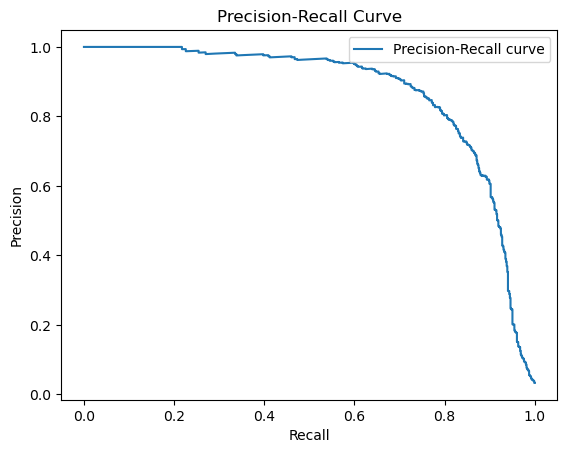

In [140]:
# Create hyperparameter dictionary for C with L2 penalty

hyperparameters_dict = {
    'C': [15, 20, 25],
    'kernel': ['rbf'],
    'gamma': [0.1],
    'class_weight': ['balanced', None]
}

ML_results_cv(X_train_NAG, X_test_NAG, y_train_NAG, y_test_NAG, hyperparameters_dict, SVC(), search_type="grid")

<br>
<br>

> ##### Insights

Precision: 0.901

Recall: 0.71

<br>
<br>
<br>

<hr>

## Reflecting on the value of each feature: Examining Coefficients

SVC doesn't support extracting feature importances, so the use coefficients of the linear model will be applied for some insight. The following importances are not a conclusive representation of the data, but may provide some insight into the model's performance.

#### Examining the coefficients of cars_ALL

In [165]:
# Appropriate the logistic regression model with parameters for coefficient interpretation.
clf = LinearSVC(intercept_scaling=0.5,max_iter=10000)
clf.fit(X_ALL, y_ALL)

# Acquire coefficients and importance values.
coefs = np.abs(clf.coef_[0])

# Create an empty dataframe to store the coefficients and feature names.
data = {'cars_ALL_Feature': cars_ALL.columns, 'Coefficient': coefs}
df = pd.DataFrame(data)

df_coefficients_ALL = df.sort_values(by="Coefficient", ascending=False).reset_index().drop("index",axis=1)
df_coefficients_ALL

,cars_ALL_Feature,Coefficient
0,car_model_12,4.881259e-01
1,car_model_6,4.285708e-01
2,car_model_13,3.329234e-01
3,1. <25,2.775226e-01
4,car_model_10,2.597308e-01
5,total_services,2.589652e-01
6,car_model_2,2.223080e-01
7,car_model_11,2.105057e-01
8,car_model_18,2.078419e-01
9,car_model_16,1.944779e-01


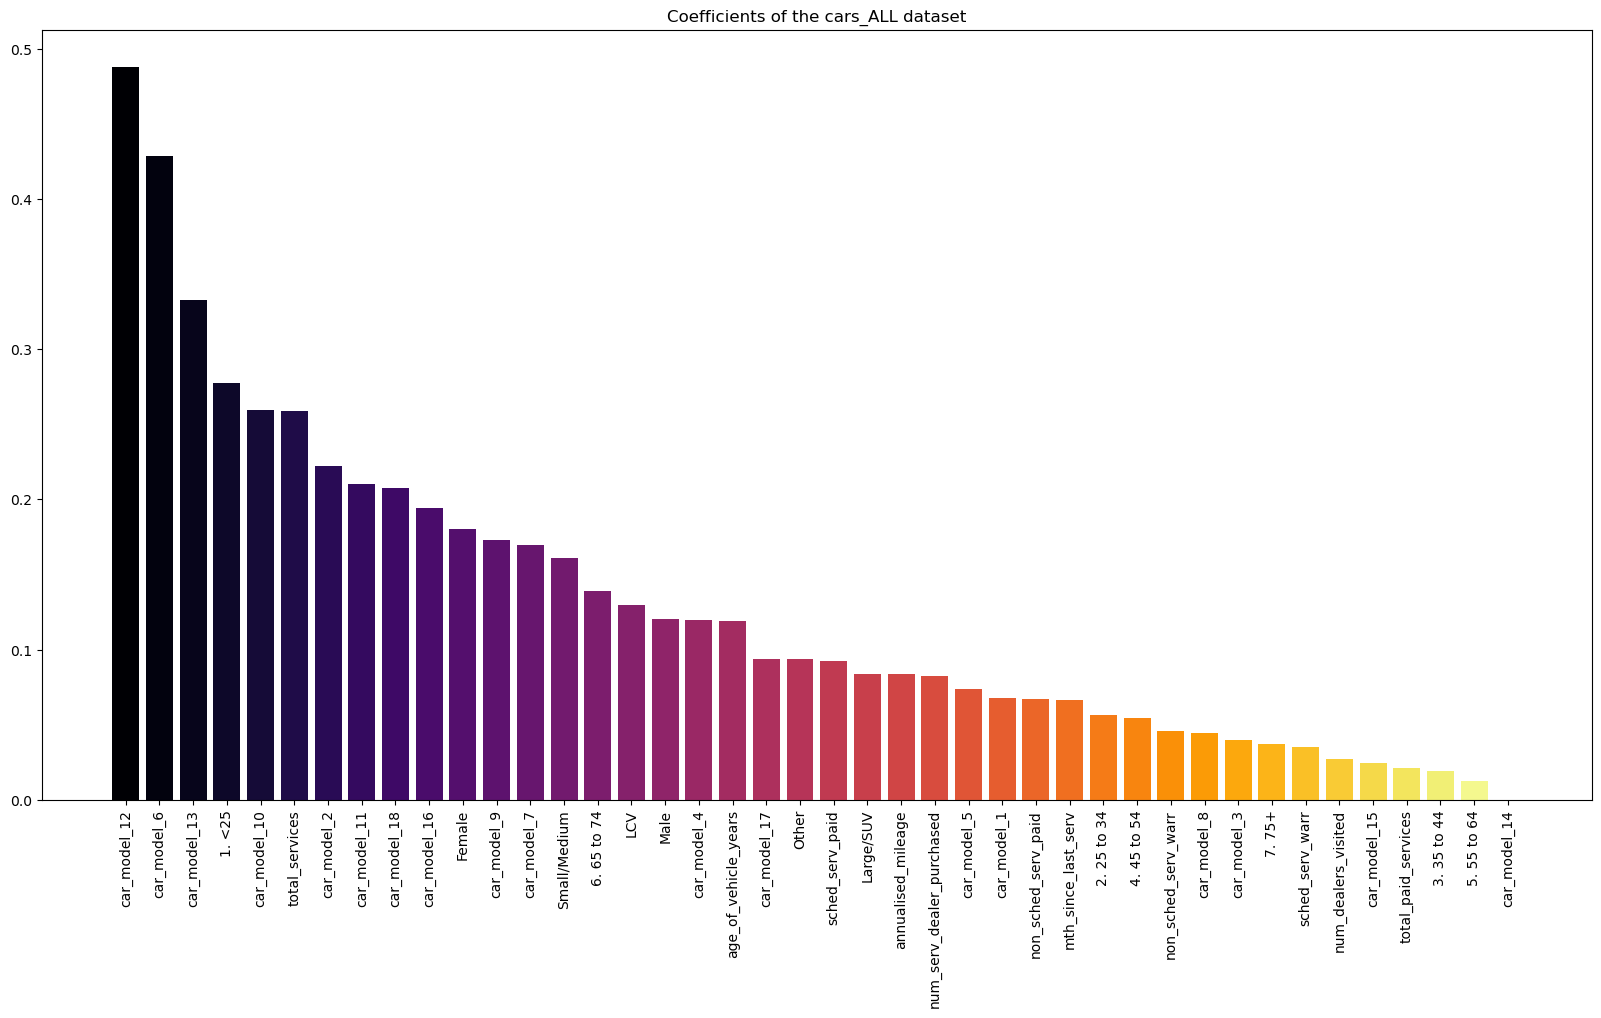

In [182]:
# Visualise the coefficients of the cars_ALL dataset.
plt.figure(figsize=(20,10))

# Define the color map.
cmap = cm.get_cmap('inferno')

# Create a normalised array of values from 0 to 1 based on the number of bars.
colors = cmap(np.linspace(0, 1, len(df_coefficients_ALL)))

# Plot the bar chart with the specified color map.
plt.bar(df_coefficients_ALL["cars_ALL_Feature"], df_coefficients_ALL["Coefficient"], color=colors)
plt.xticks(rotation=90)
plt.title("Coefficients of the cars_ALL dataset")
plt.show()

In [173]:
# Determine the value of the age and gender features by their position in the dataframe.
display(df_coefficients_ALL[df_coefficients_ALL.cars_ALL_Feature.isin(["1. <25","2. 25 to 34","3. 35 to 44","4. 45 to 54","5. 55 to 64", "6. 65 to 74","7. 75+","Male","Female"])])


,cars_ALL_Feature,Coefficient
3,1. <25,0.277523
10,Female,0.180143
14,6. 65 to 74,0.138977
16,Male,0.120435
29,2. 25 to 34,0.056388
30,4. 45 to 54,0.054237
34,7. 75+,0.037370
39,3. 35 to 44,0.019163
40,5. 55 to 64,0.012909


#### Examining the coefficients of cars_NAG

In [179]:
# Appropriate the logistic regression model with parameters for coefficient interpretation.
clf = LinearSVC(intercept_scaling=0.5,max_iter=10000)
clf.fit(X_NAG, y_NAG)

# Acquire coefficients and importance values.
coefs = np.abs(clf.coef_[0])

# Create an empty dataframe to store the coefficients and feature names.
data = {'Feature': cars_NAG.columns, 'Coefficient': coefs}
df_coefficients_NAG = pd.DataFrame(data)

# Display the table
df_coefficients_NAG.sort_values(by="Coefficient", ascending=False).reset_index().drop("index",axis=1)

,Feature,Coefficient
0,car_model_14,0.599092
1,Small/Medium,0.480495
2,Other,0.369820
3,LCV,0.319593
4,Large/SUV,0.307921
5,car_model_10,0.268682
6,car_model_15,0.265942
7,car_model_17,0.219635
8,car_model_11,0.213546
9,car_model_19,0.174275


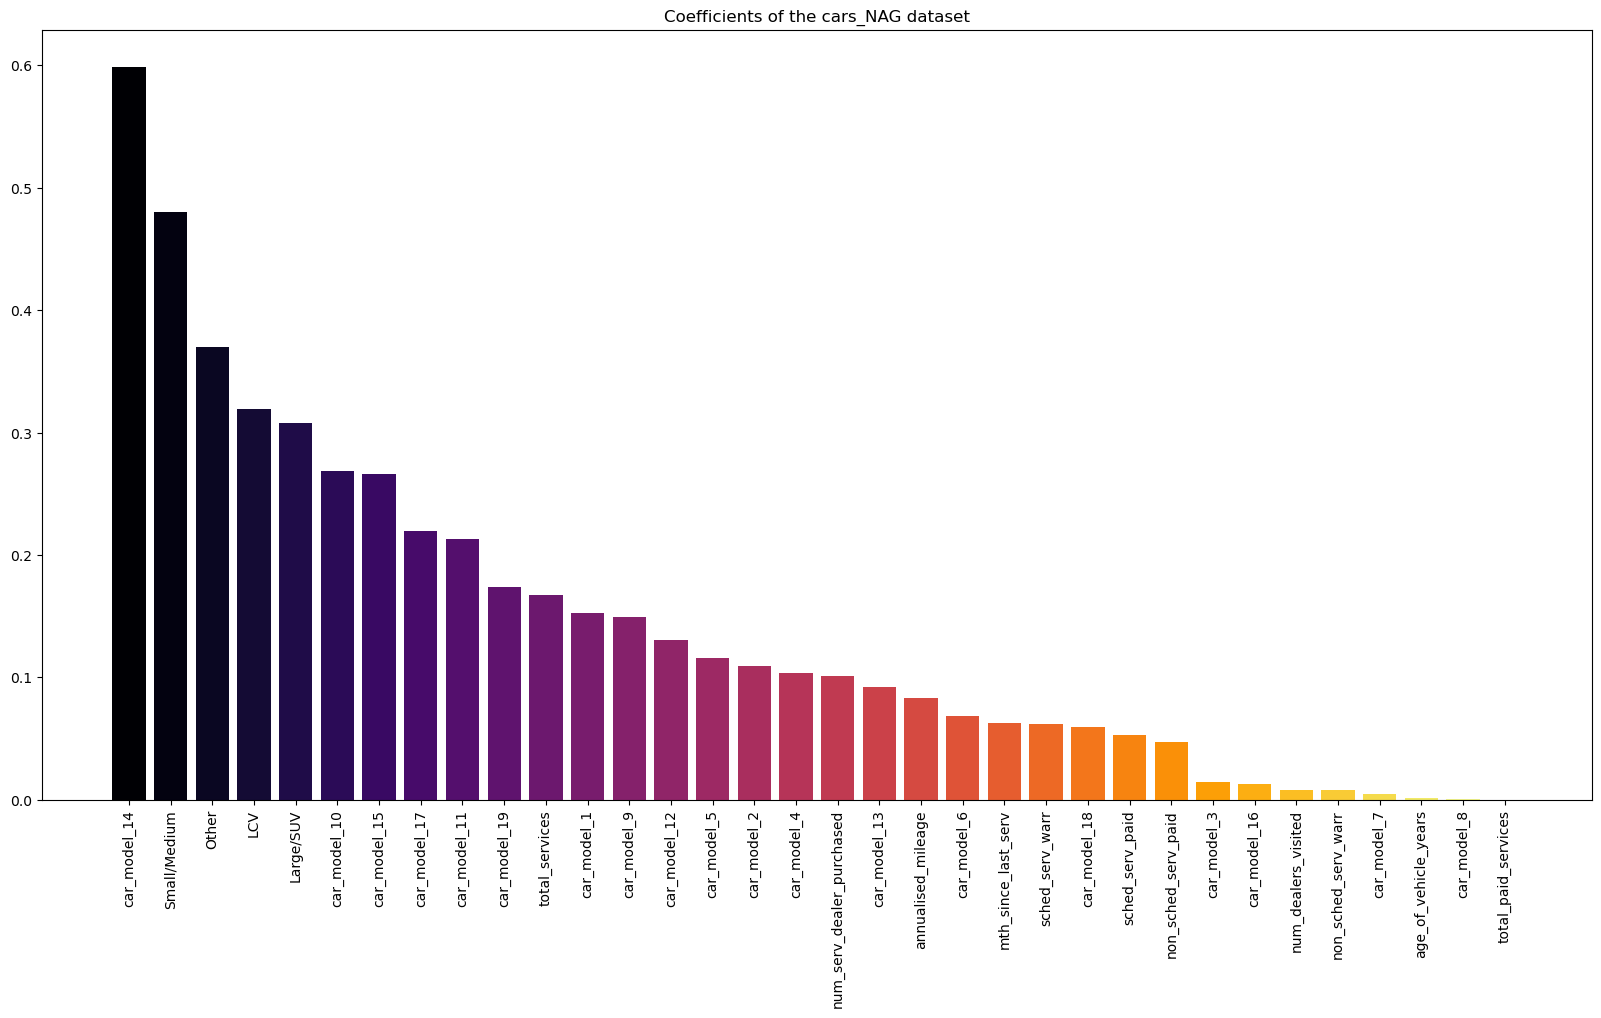

In [180]:
# Visualise the coefficients of the cars_NAG dataset.
plt.figure(figsize=(20,10))

# Define the color map.
cmap = cm.get_cmap('inferno')

# Create a normalised array of values from 0 to 1 based on the number of bars.
colors = cmap(np.linspace(0, 1, len(df_coefficients_NAG)))

# Sort the dataframe by feature importance in descending order
df_sorted = df_coefficients_NAG.sort_values(by="Coefficient", ascending=False)

# Plot the bar chart with the specified color map.
plt.bar(df_sorted["Feature"], df_sorted["Coefficient"], color=colors)
plt.xticks(rotation=90)
plt.title("Coefficients of the cars_NAG dataset")
plt.show()

<br>
<br>

> ##### Insights

Any insights extracted from the feature significance graphs are not conclusive, as the model is linear.

<br>
<br>
<br>

<hr>
<br>

**End of notebook 2.**